# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.majority, past=Past.all, durl=Durl.all, max_distance=2)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 24139 substitutions for model Model(time=Time.continuous, source=Source.majority, past=Past.all, durl=Durl.all, max_distance=2)


  0% (    1 of 24139) |           | Elapsed Time: 0:00:27 ETA:  7 days, 13:36:57

  0% (   71 of 24139) |                    | Elapsed Time: 0:00:28 ETA:  0:05:19

  0% (  142 of 24139) |                    | Elapsed Time: 0:00:29 ETA:  0:05:16

  0% (  215 of 24139) |                    | Elapsed Time: 0:00:30 ETA:  0:05:12

  1% (  282 of 24139) |                    | Elapsed Time: 0:00:31 ETA:  0:05:16

  1% (  302 of 24139) |                    | Elapsed Time: 0:00:31 ETA:  0:05:16

  1% (  370 of 24139) |                    | Elapsed Time: 0:00:32 ETA:  0:05:17

  1% (  436 of 24139) |                    | Elapsed Time: 0:00:33 ETA:  0:05:19

  2% (  506 of 24139) |                    | Elapsed Time: 0:00:34 ETA:  0:05:17

  2% (  579 of 24139) |                    | Elapsed Time: 0:00:35 ETA:  0:05:14

  2% (  604 of 24139) |                    | Elapsed Time: 0:00:35 ETA:  0:05:15

  2% (  675 of 24139) |                    | Elapsed Time: 0:00:36 ETA:  0:05:14

  3% (  748 of 24139) |                    | Elapsed Time: 0:00:37 ETA:  0:05:13

  3% (  822 of 24139) |                    | Elapsed Time: 0:00:38 ETA:  0:05:07

  3% (  889 of 24139) |                    | Elapsed Time: 0:00:39 ETA:  0:05:08

  3% (  906 of 24139) |                    | Elapsed Time: 0:00:40 ETA:  0:05:07

  3% (  964 of 24139) |                    | Elapsed Time: 0:00:41 ETA:  0:05:11

  4% ( 1030 of 24139) |                    | Elapsed Time: 0:00:42 ETA:  0:05:13

  4% ( 1077 of 24139) |                    | Elapsed Time: 0:00:43 ETA:  0:05:58

  4% ( 1149 of 24139) |                    | Elapsed Time: 0:00:44 ETA:  0:05:49

  5% ( 1207 of 24139) |#                   | Elapsed Time: 0:00:45 ETA:  0:05:52

  5% ( 1279 of 24139) |#                   | Elapsed Time: 0:00:46 ETA:  0:05:51

  5% ( 1349 of 24139) |#                   | Elapsed Time: 0:00:47 ETA:  0:05:53

  5% ( 1419 of 24139) |#                   | Elapsed Time: 0:00:48 ETA:  0:05:49

  6% ( 1492 of 24139) |#                   | Elapsed Time: 0:00:49 ETA:  0:05:41

  6% ( 1509 of 24139) |#                   | Elapsed Time: 0:00:49 ETA:  0:05:37

  6% ( 1584 of 24139) |#                   | Elapsed Time: 0:00:50 ETA:  0:05:30

  6% ( 1651 of 24139) |#                   | Elapsed Time: 0:00:51 ETA:  0:04:51

  7% ( 1697 of 24139) |#                   | Elapsed Time: 0:00:52 ETA:  0:05:06

  7% ( 1764 of 24139) |#                   | Elapsed Time: 0:00:53 ETA:  0:05:05

  7% ( 1811 of 24139) |#                   | Elapsed Time: 0:00:54 ETA:  0:05:07

  7% ( 1885 of 24139) |#                   | Elapsed Time: 0:00:55 ETA:  0:05:03

  8% ( 1955 of 24139) |#                   | Elapsed Time: 0:00:56 ETA:  0:05:02

  8% ( 2016 of 24139) |#                   | Elapsed Time: 0:00:57 ETA:  0:05:09

  8% ( 2081 of 24139) |#                   | Elapsed Time: 0:00:58 ETA:  0:05:09

  8% ( 2113 of 24139) |#                   | Elapsed Time: 0:00:59 ETA:  0:05:13

  9% ( 2181 of 24139) |#                   | Elapsed Time: 0:01:00 ETA:  0:05:11

  9% ( 2248 of 24139) |#                   | Elapsed Time: 0:01:01 ETA:  0:04:56

  9% ( 2322 of 24139) |#                   | Elapsed Time: 0:01:02 ETA:  0:04:51

  9% ( 2397 of 24139) |#                   | Elapsed Time: 0:01:03 ETA:  0:04:46

 10% ( 2414 of 24139) |##                  | Elapsed Time: 0:01:03 ETA:  0:04:49

 10% ( 2479 of 24139) |##                  | Elapsed Time: 0:01:04 ETA:  0:04:52

 10% ( 2542 of 24139) |##                  | Elapsed Time: 0:01:05 ETA:  0:04:49

 10% ( 2604 of 24139) |##                  | Elapsed Time: 0:01:06 ETA:  0:04:51

 11% ( 2657 of 24139) |##                  | Elapsed Time: 0:01:07 ETA:  0:05:00

 11% ( 2716 of 24139) |##                  | Elapsed Time: 0:01:08 ETA:  0:05:03

 11% ( 2783 of 24139) |##                  | Elapsed Time: 0:01:09 ETA:  0:05:03

 11% ( 2851 of 24139) |##                  | Elapsed Time: 0:01:10 ETA:  0:05:05

 12% ( 2917 of 24139) |##                  | Elapsed Time: 0:01:11 ETA:  0:05:11

 12% ( 2988 of 24139) |##                  | Elapsed Time: 0:01:12 ETA:  0:05:06

 12% ( 3018 of 24139) |##                  | Elapsed Time: 0:01:12 ETA:  0:05:03

 12% ( 3085 of 24139) |##                  | Elapsed Time: 0:01:13 ETA:  0:04:59

 13% ( 3162 of 24139) |##                  | Elapsed Time: 0:01:14 ETA:  0:04:48

 13% ( 3235 of 24139) |##                  | Elapsed Time: 0:01:15 ETA:  0:04:35

 13% ( 3303 of 24139) |##                  | Elapsed Time: 0:01:16 ETA:  0:04:30

 13% ( 3320 of 24139) |##                  | Elapsed Time: 0:01:17 ETA:  0:04:28

 14% ( 3386 of 24139) |##                  | Elapsed Time: 0:01:18 ETA:  0:04:28

 14% ( 3458 of 24139) |##                  | Elapsed Time: 0:01:19 ETA:  0:04:23

 14% ( 3527 of 24139) |##                  | Elapsed Time: 0:01:20 ETA:  0:04:24

 14% ( 3597 of 24139) |##                  | Elapsed Time: 0:01:21 ETA:  0:04:24

 15% ( 3621 of 24139) |###                 | Elapsed Time: 0:01:21 ETA:  0:04:21

 15% ( 3692 of 24139) |###                 | Elapsed Time: 0:01:22 ETA:  0:04:24

 15% ( 3766 of 24139) |###                 | Elapsed Time: 0:01:23 ETA:  0:04:22

 15% ( 3835 of 24139) |###                 | Elapsed Time: 0:01:24 ETA:  0:04:21

 16% ( 3902 of 24139) |###                 | Elapsed Time: 0:01:25 ETA:  0:04:22

 16% ( 3923 of 24139) |###                 | Elapsed Time: 0:01:25 ETA:  0:04:19

 16% ( 3994 of 24139) |###                 | Elapsed Time: 0:01:26 ETA:  0:04:19

 16% ( 4060 of 24139) |###                 | Elapsed Time: 0:01:27 ETA:  0:04:20

 17% ( 4128 of 24139) |###                 | Elapsed Time: 0:01:28 ETA:  0:04:20

 17% ( 4150 of 24139) |###                 | Elapsed Time: 0:01:30 ETA:  0:05:15

 17% ( 4200 of 24139) |###                 | Elapsed Time: 0:01:31 ETA:  0:05:30

 17% ( 4225 of 24139) |###                 | Elapsed Time: 0:01:31 ETA:  0:05:52

 17% ( 4280 of 24139) |###                 | Elapsed Time: 0:01:32 ETA:  0:06:05

 17% ( 4331 of 24139) |###                 | Elapsed Time: 0:01:33 ETA:  0:06:22

 18% ( 4389 of 24139) |###                 | Elapsed Time: 0:01:34 ETA:  0:06:19

 18% ( 4454 of 24139) |###                 | Elapsed Time: 0:01:35 ETA:  0:06:25

 18% ( 4527 of 24139) |###                 | Elapsed Time: 0:01:36 ETA:  0:06:14

 19% ( 4601 of 24139) |###                 | Elapsed Time: 0:01:37 ETA:  0:06:07

 19% ( 4671 of 24139) |###                 | Elapsed Time: 0:01:38 ETA:  0:04:59

 19% ( 4743 of 24139) |###                 | Elapsed Time: 0:01:39 ETA:  0:04:41

 20% ( 4828 of 24139) |####                | Elapsed Time: 0:01:41 ETA:  0:04:19

 20% ( 4894 of 24139) |####                | Elapsed Time: 0:01:42 ETA:  0:04:08

 20% ( 4961 of 24139) |####                | Elapsed Time: 0:01:43 ETA:  0:04:01

 20% ( 5030 of 24139) |####                | Elapsed Time: 0:01:44 ETA:  0:03:58

 21% ( 5103 of 24139) |####                | Elapsed Time: 0:01:45 ETA:  0:03:59

 21% ( 5130 of 24139) |####                | Elapsed Time: 0:01:45 ETA:  0:04:01

 21% ( 5194 of 24139) |####                | Elapsed Time: 0:01:46 ETA:  0:04:04

 21% ( 5263 of 24139) |####                | Elapsed Time: 0:01:47 ETA:  0:04:06

 22% ( 5335 of 24139) |####                | Elapsed Time: 0:01:48 ETA:  0:04:06

 22% ( 5400 of 24139) |####                | Elapsed Time: 0:01:49 ETA:  0:04:07

 22% ( 5432 of 24139) |####                | Elapsed Time: 0:01:50 ETA:  0:04:08

 22% ( 5502 of 24139) |####                | Elapsed Time: 0:01:51 ETA:  0:04:05

 23% ( 5570 of 24139) |####                | Elapsed Time: 0:01:52 ETA:  0:04:05

 23% ( 5642 of 24139) |####                | Elapsed Time: 0:01:53 ETA:  0:04:04

 23% ( 5717 of 24139) |####                | Elapsed Time: 0:01:54 ETA:  0:03:59

 23% ( 5734 of 24139) |####                | Elapsed Time: 0:01:54 ETA:  0:03:55

 24% ( 5807 of 24139) |####                | Elapsed Time: 0:01:55 ETA:  0:03:51

 24% ( 5880 of 24139) |####                | Elapsed Time: 0:01:56 ETA:  0:03:50

 24% ( 5945 of 24139) |####                | Elapsed Time: 0:01:57 ETA:  0:03:49

 24% ( 6016 of 24139) |####                | Elapsed Time: 0:01:58 ETA:  0:03:44

 25% ( 6035 of 24139) |#####               | Elapsed Time: 0:01:58 ETA:  0:03:43

 25% ( 6099 of 24139) |#####               | Elapsed Time: 0:01:59 ETA:  0:03:45

 25% ( 6146 of 24139) |#####               | Elapsed Time: 0:02:00 ETA:  0:04:02

 25% ( 6191 of 24139) |#####               | Elapsed Time: 0:02:01 ETA:  0:04:24

 25% ( 6245 of 24139) |#####               | Elapsed Time: 0:02:02 ETA:  0:04:32

 26% ( 6309 of 24139) |#####               | Elapsed Time: 0:02:03 ETA:  0:04:37

 26% ( 6337 of 24139) |#####               | Elapsed Time: 0:02:04 ETA:  0:04:45

 26% ( 6397 of 24139) |#####               | Elapsed Time: 0:02:05 ETA:  0:04:49

 26% ( 6464 of 24139) |#####               | Elapsed Time: 0:02:06 ETA:  0:04:52

 27% ( 6539 of 24139) |#####               | Elapsed Time: 0:02:07 ETA:  0:04:39

 27% ( 6615 of 24139) |#####               | Elapsed Time: 0:02:08 ETA:  0:04:28

 27% ( 6639 of 24139) |#####               | Elapsed Time: 0:02:08 ETA:  0:04:16

 27% ( 6705 of 24139) |#####               | Elapsed Time: 0:02:09 ETA:  0:03:59

 28% ( 6774 of 24139) |#####               | Elapsed Time: 0:02:10 ETA:  0:03:48

 28% ( 6845 of 24139) |#####               | Elapsed Time: 0:02:11 ETA:  0:03:42

 28% ( 6922 of 24139) |#####               | Elapsed Time: 0:02:12 ETA:  0:03:37

 28% ( 6940 of 24139) |#####               | Elapsed Time: 0:02:12 ETA:  0:03:29

 29% ( 7010 of 24139) |#####               | Elapsed Time: 0:02:13 ETA:  0:03:26

 29% ( 7078 of 24139) |#####               | Elapsed Time: 0:02:14 ETA:  0:03:30

 29% ( 7156 of 24139) |#####               | Elapsed Time: 0:02:15 ETA:  0:03:27

 30% ( 7242 of 24139) |######              | Elapsed Time: 0:02:16 ETA:  0:03:18

 30% ( 7312 of 24139) |######              | Elapsed Time: 0:02:17 ETA:  0:03:17

 30% ( 7381 of 24139) |######              | Elapsed Time: 0:02:18 ETA:  0:03:17

 30% ( 7454 of 24139) |######              | Elapsed Time: 0:02:19 ETA:  0:03:18

 31% ( 7523 of 24139) |######              | Elapsed Time: 0:02:21 ETA:  0:03:19

 31% ( 7544 of 24139) |######              | Elapsed Time: 0:02:21 ETA:  0:03:19

 31% ( 7616 of 24139) |######              | Elapsed Time: 0:02:22 ETA:  0:03:16

 31% ( 7693 of 24139) |######              | Elapsed Time: 0:02:23 ETA:  0:03:15

 32% ( 7768 of 24139) |######              | Elapsed Time: 0:02:24 ETA:  0:03:14

 32% ( 7846 of 24139) |######              | Elapsed Time: 0:02:25 ETA:  0:03:09

 32% ( 7921 of 24139) |######              | Elapsed Time: 0:02:26 ETA:  0:03:04

 33% ( 7984 of 24139) |######              | Elapsed Time: 0:02:27 ETA:  0:03:09

 33% ( 7991 of 24139) |######              | Elapsed Time: 0:02:28 ETA:  0:04:14

 33% ( 8062 of 24139) |######              | Elapsed Time: 0:02:29 ETA:  0:04:07

 33% ( 8147 of 24139) |######              | Elapsed Time: 0:02:30 ETA:  0:04:15

 34% ( 8222 of 24139) |######              | Elapsed Time: 0:02:31 ETA:  0:04:14

 34% ( 8298 of 24139) |######              | Elapsed Time: 0:02:32 ETA:  0:04:12

 34% ( 8374 of 24139) |######              | Elapsed Time: 0:02:34 ETA:  0:03:59

 35% ( 8449 of 24139) |#######             | Elapsed Time: 0:02:35 ETA:  0:04:00

 35% ( 8524 of 24139) |#######             | Elapsed Time: 0:02:36 ETA:  0:02:50

 35% ( 8599 of 24139) |#######             | Elapsed Time: 0:02:37 ETA:  0:02:46

 35% ( 8671 of 24139) |#######             | Elapsed Time: 0:02:38 ETA:  0:02:47

 36% ( 8751 of 24139) |#######             | Elapsed Time: 0:02:39 ETA:  0:02:50

 36% ( 8827 of 24139) |#######             | Elapsed Time: 0:02:40 ETA:  0:02:48

 36% ( 8903 of 24139) |#######             | Elapsed Time: 0:02:41 ETA:  0:02:47

 37% ( 8975 of 24139) |#######             | Elapsed Time: 0:02:42 ETA:  0:02:47

 37% ( 9053 of 24139) |#######             | Elapsed Time: 0:02:43 ETA:  0:02:46

 37% ( 9130 of 24139) |#######             | Elapsed Time: 0:02:44 ETA:  0:02:43

 38% ( 9210 of 24139) |#######             | Elapsed Time: 0:02:45 ETA:  0:02:37

 38% ( 9287 of 24139) |#######             | Elapsed Time: 0:02:46 ETA:  0:02:31

 38% ( 9354 of 24139) |#######             | Elapsed Time: 0:02:47 ETA:  0:02:33

 39% ( 9424 of 24139) |#######             | Elapsed Time: 0:02:48 ETA:  0:02:36

 39% ( 9498 of 24139) |#######             | Elapsed Time: 0:02:49 ETA:  0:02:36

 39% ( 9571 of 24139) |#######             | Elapsed Time: 0:02:50 ETA:  0:02:34

 39% ( 9640 of 24139) |#######             | Elapsed Time: 0:02:51 ETA:  0:02:37

 40% ( 9656 of 24139) |########            | Elapsed Time: 0:02:51 ETA:  0:02:37

 40% ( 9730 of 24139) |########            | Elapsed Time: 0:02:52 ETA:  0:02:38

 40% ( 9803 of 24139) |########            | Elapsed Time: 0:02:53 ETA:  0:02:41

 40% ( 9872 of 24139) |########            | Elapsed Time: 0:02:54 ETA:  0:02:44

 41% ( 9958 of 24139) |########            | Elapsed Time: 0:02:55 ETA:  0:02:39

 41% (10030 of 24139) |########            | Elapsed Time: 0:02:56 ETA:  0:02:39

 41% (10103 of 24139) |########            | Elapsed Time: 0:02:57 ETA:  0:02:38

 42% (10178 of 24139) |########            | Elapsed Time: 0:02:58 ETA:  0:02:33

 42% (10260 of 24139) |########            | Elapsed Time: 0:02:59 ETA:  0:02:33

 42% (10331 of 24139) |########            | Elapsed Time: 0:03:00 ETA:  0:02:34

 43% (10403 of 24139) |########            | Elapsed Time: 0:03:01 ETA:  0:02:31

 43% (10479 of 24139) |########            | Elapsed Time: 0:03:02 ETA:  0:02:30

 43% (10561 of 24139) |########            | Elapsed Time: 0:03:03 ETA:  0:02:26

 44% (10630 of 24139) |########            | Elapsed Time: 0:03:04 ETA:  0:02:28

 44% (10702 of 24139) |########            | Elapsed Time: 0:03:05 ETA:  0:02:28

 44% (10779 of 24139) |########            | Elapsed Time: 0:03:06 ETA:  0:02:24

 45% (10863 of 24139) |#########           | Elapsed Time: 0:03:08 ETA:  0:02:21

 45% (10938 of 24139) |#########           | Elapsed Time: 0:03:09 ETA:  0:02:18

 45% (11009 of 24139) |#########           | Elapsed Time: 0:03:10 ETA:  0:02:20

 45% (11080 of 24139) |#########           | Elapsed Time: 0:03:11 ETA:  0:02:22

 46% (11143 of 24139) |#########           | Elapsed Time: 0:03:12 ETA:  0:02:26

 46% (11165 of 24139) |#########           | Elapsed Time: 0:03:12 ETA:  0:02:28

 46% (11242 of 24139) |#########           | Elapsed Time: 0:03:13 ETA:  0:02:24

 46% (11305 of 24139) |#########           | Elapsed Time: 0:03:14 ETA:  0:02:32

 47% (11371 of 24139) |#########           | Elapsed Time: 0:03:15 ETA:  0:02:35

 47% (11438 of 24139) |#########           | Elapsed Time: 0:03:16 ETA:  0:02:36

 47% (11467 of 24139) |#########           | Elapsed Time: 0:03:16 ETA:  0:02:43

 47% (11539 of 24139) |#########           | Elapsed Time: 0:03:17 ETA:  0:02:41

 48% (11616 of 24139) |#########           | Elapsed Time: 0:03:18 ETA:  0:02:36

 48% (11686 of 24139) |#########           | Elapsed Time: 0:03:19 ETA:  0:02:31

 48% (11768 of 24139) |#########           | Elapsed Time: 0:03:21 ETA:  0:02:27

 49% (11842 of 24139) |#########           | Elapsed Time: 0:03:22 ETA:  0:02:19

 49% (11911 of 24139) |#########           | Elapsed Time: 0:03:23 ETA:  0:02:17

 49% (11978 of 24139) |#########           | Elapsed Time: 0:03:24 ETA:  0:02:16

 49% (12047 of 24139) |#########           | Elapsed Time: 0:03:25 ETA:  0:02:13

 50% (12070 of 24139) |##########          | Elapsed Time: 0:03:25 ETA:  0:02:16

 50% (12135 of 24139) |##########          | Elapsed Time: 0:03:26 ETA:  0:02:23

 50% (12201 of 24139) |##########          | Elapsed Time: 0:03:27 ETA:  0:02:25

 50% (12272 of 24139) |##########          | Elapsed Time: 0:03:28 ETA:  0:02:28

 51% (12341 of 24139) |##########          | Elapsed Time: 0:03:29 ETA:  0:02:27

 51% (12372 of 24139) |##########          | Elapsed Time: 0:03:30 ETA:  0:02:30

 51% (12442 of 24139) |##########          | Elapsed Time: 0:03:31 ETA:  0:02:29

 51% (12514 of 24139) |##########          | Elapsed Time: 0:03:32 ETA:  0:02:25

 52% (12583 of 24139) |##########          | Elapsed Time: 0:03:33 ETA:  0:02:24

 52% (12656 of 24139) |##########          | Elapsed Time: 0:03:34 ETA:  0:02:17

 52% (12673 of 24139) |##########          | Elapsed Time: 0:03:34 ETA:  0:02:14

 52% (12722 of 24139) |##########          | Elapsed Time: 0:03:36 ETA:  0:03:25

 52% (12771 of 24139) |##########          | Elapsed Time: 0:03:37 ETA:  0:03:43

 53% (12840 of 24139) |##########          | Elapsed Time: 0:03:38 ETA:  0:03:42

 53% (12903 of 24139) |##########          | Elapsed Time: 0:03:39 ETA:  0:03:39

 53% (12975 of 24139) |##########          | Elapsed Time: 0:03:40 ETA:  0:03:54

 54% (13045 of 24139) |##########          | Elapsed Time: 0:03:41 ETA:  0:03:52

 54% (13120 of 24139) |##########          | Elapsed Time: 0:03:42 ETA:  0:03:49

 54% (13192 of 24139) |##########          | Elapsed Time: 0:03:43 ETA:  0:03:36

 55% (13277 of 24139) |###########         | Elapsed Time: 0:03:44 ETA:  0:02:00

 55% (13354 of 24139) |###########         | Elapsed Time: 0:03:45 ETA:  0:01:54

 55% (13430 of 24139) |###########         | Elapsed Time: 0:03:46 ETA:  0:01:45

 55% (13505 of 24139) |###########         | Elapsed Time: 0:03:47 ETA:  0:01:39

 56% (13579 of 24139) |###########         | Elapsed Time: 0:03:48 ETA:  0:01:39

 56% (13655 of 24139) |###########         | Elapsed Time: 0:03:49 ETA:  0:01:34

 56% (13731 of 24139) |###########         | Elapsed Time: 0:03:50 ETA:  0:01:33

 57% (13804 of 24139) |###########         | Elapsed Time: 0:03:51 ETA:  0:01:31

 57% (13880 of 24139) |###########         | Elapsed Time: 0:03:53 ETA:  0:01:31

 57% (13955 of 24139) |###########         | Elapsed Time: 0:03:54 ETA:  0:01:30

 58% (14029 of 24139) |###########         | Elapsed Time: 0:03:55 ETA:  0:01:30

 58% (14103 of 24139) |###########         | Elapsed Time: 0:03:56 ETA:  0:01:30

 58% (14182 of 24139) |###########         | Elapsed Time: 0:03:57 ETA:  0:01:31

 59% (14258 of 24139) |###########         | Elapsed Time: 0:03:58 ETA:  0:01:30

 59% (14336 of 24139) |###########         | Elapsed Time: 0:03:59 ETA:  0:01:25

 59% (14409 of 24139) |###########         | Elapsed Time: 0:04:00 ETA:  0:01:25

 60% (14484 of 24139) |############        | Elapsed Time: 0:04:01 ETA:  0:01:27

 60% (14562 of 24139) |############        | Elapsed Time: 0:04:02 ETA:  0:01:24

 60% (14623 of 24139) |############        | Elapsed Time: 0:04:03 ETA:  0:01:31

 60% (14686 of 24139) |############        | Elapsed Time: 0:04:04 ETA:  0:01:36

 61% (14755 of 24139) |############        | Elapsed Time: 0:04:05 ETA:  0:01:36

 61% (14786 of 24139) |############        | Elapsed Time: 0:04:05 ETA:  0:01:38

 61% (14859 of 24139) |############        | Elapsed Time: 0:04:06 ETA:  0:01:40

 61% (14928 of 24139) |############        | Elapsed Time: 0:04:07 ETA:  0:01:42

 62% (14991 of 24139) |############        | Elapsed Time: 0:04:08 ETA:  0:01:46

 62% (15058 of 24139) |############        | Elapsed Time: 0:04:09 ETA:  0:01:46

 62% (15087 of 24139) |############        | Elapsed Time: 0:04:10 ETA:  0:01:50

 62% (15153 of 24139) |############        | Elapsed Time: 0:04:11 ETA:  0:01:46

 63% (15222 of 24139) |############        | Elapsed Time: 0:04:12 ETA:  0:01:42

 63% (15293 of 24139) |############        | Elapsed Time: 0:04:13 ETA:  0:01:39

 63% (15369 of 24139) |############        | Elapsed Time: 0:04:14 ETA:  0:01:35

 63% (15389 of 24139) |############        | Elapsed Time: 0:04:14 ETA:  0:01:37

 64% (15460 of 24139) |############        | Elapsed Time: 0:04:15 ETA:  0:01:35

 64% (15527 of 24139) |############        | Elapsed Time: 0:04:16 ETA:  0:01:31

 64% (15594 of 24139) |############        | Elapsed Time: 0:04:17 ETA:  0:01:30

 64% (15668 of 24139) |############        | Elapsed Time: 0:04:18 ETA:  0:01:28

 65% (15691 of 24139) |#############       | Elapsed Time: 0:04:18 ETA:  0:01:23

 65% (15767 of 24139) |#############       | Elapsed Time: 0:04:19 ETA:  0:01:18

 65% (15841 of 24139) |#############       | Elapsed Time: 0:04:20 ETA:  0:01:15

 65% (15916 of 24139) |#############       | Elapsed Time: 0:04:21 ETA:  0:01:15

 66% (15993 of 24139) |#############       | Elapsed Time: 0:04:22 ETA:  0:01:10

 66% (16063 of 24139) |#############       | Elapsed Time: 0:04:23 ETA:  0:01:10

 66% (16136 of 24139) |#############       | Elapsed Time: 0:04:24 ETA:  0:01:05

 67% (16210 of 24139) |#############       | Elapsed Time: 0:04:25 ETA:  0:01:01

 67% (16294 of 24139) |#############       | Elapsed Time: 0:04:26 ETA:  0:01:00

 67% (16363 of 24139) |#############       | Elapsed Time: 0:04:27 ETA:  0:01:03

 68% (16428 of 24139) |#############       | Elapsed Time: 0:04:28 ETA:  0:01:06

 68% (16499 of 24139) |#############       | Elapsed Time: 0:04:29 ETA:  0:01:08

 68% (16566 of 24139) |#############       | Elapsed Time: 0:04:30 ETA:  0:01:14

 68% (16596 of 24139) |#############       | Elapsed Time: 0:04:31 ETA:  0:01:14

 69% (16661 of 24139) |#############       | Elapsed Time: 0:04:32 ETA:  0:01:18

 69% (16725 of 24139) |#############       | Elapsed Time: 0:04:33 ETA:  0:01:24

 69% (16793 of 24139) |#############       | Elapsed Time: 0:04:34 ETA:  0:01:28

 69% (16861 of 24139) |#############       | Elapsed Time: 0:04:35 ETA:  0:01:26

 70% (16898 of 24139) |##############      | Elapsed Time: 0:04:35 ETA:  0:01:26

 70% (16970 of 24139) |##############      | Elapsed Time: 0:04:36 ETA:  0:01:21

 70% (17044 of 24139) |##############      | Elapsed Time: 0:04:37 ETA:  0:01:18

 70% (17117 of 24139) |##############      | Elapsed Time: 0:04:38 ETA:  0:01:12

 71% (17185 of 24139) |##############      | Elapsed Time: 0:04:39 ETA:  0:01:12

 71% (17200 of 24139) |##############      | Elapsed Time: 0:04:40 ETA:  0:01:08

 71% (17276 of 24139) |##############      | Elapsed Time: 0:04:41 ETA:  0:01:00

 71% (17347 of 24139) |##############      | Elapsed Time: 0:04:42 ETA:  0:00:57

 72% (17423 of 24139) |##############      | Elapsed Time: 0:04:43 ETA:  0:00:51

 72% (17501 of 24139) |##############      | Elapsed Time: 0:04:44 ETA:  0:00:47

 72% (17575 of 24139) |##############      | Elapsed Time: 0:04:45 ETA:  0:00:46

 73% (17649 of 24139) |##############      | Elapsed Time: 0:04:46 ETA:  0:00:45

 73% (17722 of 24139) |##############      | Elapsed Time: 0:04:47 ETA:  0:00:41

 73% (17803 of 24139) |##############      | Elapsed Time: 0:04:48 ETA:  0:00:40

 74% (17874 of 24139) |##############      | Elapsed Time: 0:04:49 ETA:  0:00:40

 74% (17945 of 24139) |##############      | Elapsed Time: 0:04:50 ETA:  0:00:42

 74% (18020 of 24139) |##############      | Elapsed Time: 0:04:51 ETA:  0:00:41

 74% (18091 of 24139) |##############      | Elapsed Time: 0:04:52 ETA:  0:00:41

 75% (18105 of 24139) |###############     | Elapsed Time: 0:04:52 ETA:  0:00:42

 75% (18176 of 24139) |###############     | Elapsed Time: 0:04:53 ETA:  0:00:43

 75% (18245 of 24139) |###############     | Elapsed Time: 0:04:54 ETA:  0:00:44

 75% (18319 of 24139) |###############     | Elapsed Time: 0:04:55 ETA:  0:00:42

 76% (18406 of 24139) |###############     | Elapsed Time: 0:04:56 ETA:  0:00:40

 76% (18480 of 24139) |###############     | Elapsed Time: 0:04:57 ETA:  0:00:37

 76% (18554 of 24139) |###############     | Elapsed Time: 0:04:58 ETA:  0:00:36

 76% (18579 of 24139) |###############     | Elapsed Time: 0:05:01 ETA:  0:02:20

 77% (18648 of 24139) |###############     | Elapsed Time: 0:05:02 ETA:  0:02:10

 77% (18708 of 24139) |###############     | Elapsed Time: 0:05:03 ETA:  0:02:12

 77% (18774 of 24139) |###############     | Elapsed Time: 0:05:04 ETA:  0:02:13

 78% (18838 of 24139) |###############     | Elapsed Time: 0:05:05 ETA:  0:02:21

 78% (18907 of 24139) |###############     | Elapsed Time: 0:05:06 ETA:  0:02:23

 78% (18980 of 24139) |###############     | Elapsed Time: 0:05:07 ETA:  0:02:10

 78% (19010 of 24139) |###############     | Elapsed Time: 0:05:07 ETA:  0:02:19

 79% (19085 of 24139) |###############     | Elapsed Time: 0:05:08 ETA:  0:02:17

 79% (19156 of 24139) |###############     | Elapsed Time: 0:05:09 ETA:  0:00:38

 79% (19231 of 24139) |###############     | Elapsed Time: 0:05:10 ETA:  0:00:33

 80% (19312 of 24139) |################    | Elapsed Time: 0:05:11 ETA:  0:00:27

 80% (19388 of 24139) |################    | Elapsed Time: 0:05:12 ETA:  0:00:19

 80% (19461 of 24139) |################    | Elapsed Time: 0:05:13 ETA:  0:00:15

 80% (19534 of 24139) |################    | Elapsed Time: 0:05:14 ETA:  0:00:14

 81% (19613 of 24139) |################    | Elapsed Time: 0:05:15 ETA:  0:00:13

 81% (19680 of 24139) |################    | Elapsed Time: 0:05:16 ETA:  0:00:14

 81% (19755 of 24139) |################    | Elapsed Time: 0:05:17 ETA:  0:00:13

 82% (19828 of 24139) |################    | Elapsed Time: 0:05:18 ETA:  0:00:13

 82% (19915 of 24139) |################    | Elapsed Time: 0:05:20 ETA:  0:00:13

 82% (19987 of 24139) |################    | Elapsed Time: 0:05:21 ETA:  0:00:13

 83% (20063 of 24139) |################    | Elapsed Time: 0:05:22 ETA:  0:00:10

 83% (20138 of 24139) |################    | Elapsed Time: 0:05:23 ETA:  0:00:09

 83% (20217 of 24139) |################    | Elapsed Time: 0:05:24 ETA:  0:00:08

 84% (20291 of 24139) |################    | Elapsed Time: 0:05:25 ETA:  0:00:08

 84% (20366 of 24139) |################    | Elapsed Time: 0:05:26 ETA:  0:00:06

 84% (20437 of 24139) |################    | Elapsed Time: 0:05:27 ETA:  0:00:05

 85% (20519 of 24139) |#################   | Elapsed Time: 0:05:28 ETA:  0:00:05

 85% (20591 of 24139) |#################   | Elapsed Time: 0:05:29 ETA:  0:00:07

 85% (20659 of 24139) |#################   | Elapsed Time: 0:05:30 ETA:  0:00:10

 85% (20730 of 24139) |#################   | Elapsed Time: 0:05:31 ETA:  0:00:06

 86% (20820 of 24139) |#################   | Elapsed Time: 0:05:32 ETA:  0:00:03

 86% (20891 of 24139) |#################   | Elapsed Time: 0:05:33 ETA:  0:00:05

 86% (20960 of 24139) |#################   | Elapsed Time: 0:05:34 ETA:  0:00:05

 87% (21024 of 24139) |#################   | Elapsed Time: 0:05:35 ETA:  0:00:09

 87% (21094 of 24139) |#################   | Elapsed Time: 0:05:36 ETA:  0:00:08

 87% (21122 of 24139) |#################   | Elapsed Time: 0:05:37 ETA:  0:00:09

 87% (21192 of 24139) |#################   | Elapsed Time: 0:05:38 ETA:  0:00:06

 88% (21261 of 24139) |#################   | Elapsed Time: 0:05:39 ETA:  0:00:07

 88% (21332 of 24139) |#################   | Elapsed Time: 0:05:40 ETA:  0:00:09

 88% (21400 of 24139) |#################   | Elapsed Time: 0:05:41 ETA:  0:00:10

 88% (21424 of 24139) |#################   | Elapsed Time: 0:05:41 ETA:  0:00:09

 89% (21502 of 24139) |#################   | Elapsed Time: 0:05:42 ETA:  0:00:03

 89% (21576 of 24139) |#################   | Elapsed Time: 0:05:43 ETA:  0:00:00

 89% (21649 of 24139) |#################   | Elapsed Time: 0:05:44 ETA:  0:00:00

 90% (21726 of 24139) |##################  | Elapsed Time: 0:05:45 ETA:  0:00:00

 90% (21795 of 24139) |##################  | Elapsed Time: 0:05:46 ETA:  0:00:00

 90% (21869 of 24139) |##################  | Elapsed Time: 0:05:47 ETA:  0:00:00

 90% (21943 of 24139) |##################  | Elapsed Time: 0:05:48 ETA:  0:00:00

 91% (22027 of 24139) |##################  | Elapsed Time: 0:05:49 ETA:  0:00:00

 91% (22099 of 24139) |##################  | Elapsed Time: 0:05:50 ETA:  0:00:00

 91% (22170 of 24139) |##################  | Elapsed Time: 0:05:51 ETA:  0:00:00

 92% (22243 of 24139) |##################  | Elapsed Time: 0:05:52 ETA:  0:00:00

 92% (22312 of 24139) |##################  | Elapsed Time: 0:05:53 ETA:  0:00:00

 92% (22329 of 24139) |##################  | Elapsed Time: 0:05:54 ETA:  0:00:00

 92% (22400 of 24139) |##################  | Elapsed Time: 0:05:55 ETA:  0:00:00

 93% (22470 of 24139) |##################  | Elapsed Time: 0:05:56 ETA:  0:00:00

 93% (22538 of 24139) |##################  | Elapsed Time: 0:05:57 ETA:  0:00:00

 93% (22605 of 24139) |##################  | Elapsed Time: 0:05:58 ETA:  0:00:00

 93% (22631 of 24139) |##################  | Elapsed Time: 0:05:58 ETA:  0:00:00

 94% (22703 of 24139) |##################  | Elapsed Time: 0:05:59 ETA:  0:00:00

 94% (22772 of 24139) |##################  | Elapsed Time: 0:06:00 ETA:  0:00:00

 94% (22844 of 24139) |##################  | Elapsed Time: 0:06:01 ETA:  0:00:00

 95% (22933 of 24139) |################### | Elapsed Time: 0:06:02 ETA:  0:00:00

 95% (23005 of 24139) |################### | Elapsed Time: 0:06:03 ETA:  0:00:00

 95% (23077 of 24139) |################### | Elapsed Time: 0:06:04 ETA:  0:00:00

 95% (23150 of 24139) |################### | Elapsed Time: 0:06:05 ETA:  0:00:00

 96% (23234 of 24139) |################### | Elapsed Time: 0:06:06 ETA:  0:00:00

 96% (23308 of 24139) |################### | Elapsed Time: 0:06:07 ETA:  0:00:00

 96% (23380 of 24139) |################### | Elapsed Time: 0:06:08 ETA:  0:00:00

 97% (23451 of 24139) |################### | Elapsed Time: 0:06:09 ETA:  0:00:00

 97% (23536 of 24139) |################### | Elapsed Time: 0:06:11 ETA:  0:00:00

 97% (23606 of 24139) |################### | Elapsed Time: 0:06:12 ETA:  0:00:00

 98% (23677 of 24139) |################### | Elapsed Time: 0:06:13 ETA:  0:00:00

 98% (23748 of 24139) |################### | Elapsed Time: 0:06:14 ETA:  0:00:00

 98% (23822 of 24139) |################### | Elapsed Time: 0:06:15 ETA:  0:00:00

 98% (23838 of 24139) |################### | Elapsed Time: 0:06:15 ETA:  0:00:00

 99% (23913 of 24139) |################### | Elapsed Time: 0:06:16 ETA:  0:00:00

 99% (23984 of 24139) |################### | Elapsed Time: 0:06:17 ETA:  0:00:00

 99% (24055 of 24139) |################### | Elapsed Time: 0:06:18 ETA:  0:00:00

 99% (24124 of 24139) |################### | Elapsed Time: 0:06:19 ETA:  0:00:00

100% (24139 of 24139) |####################| Elapsed Time: 0:06:19 Time: 0:06:19


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

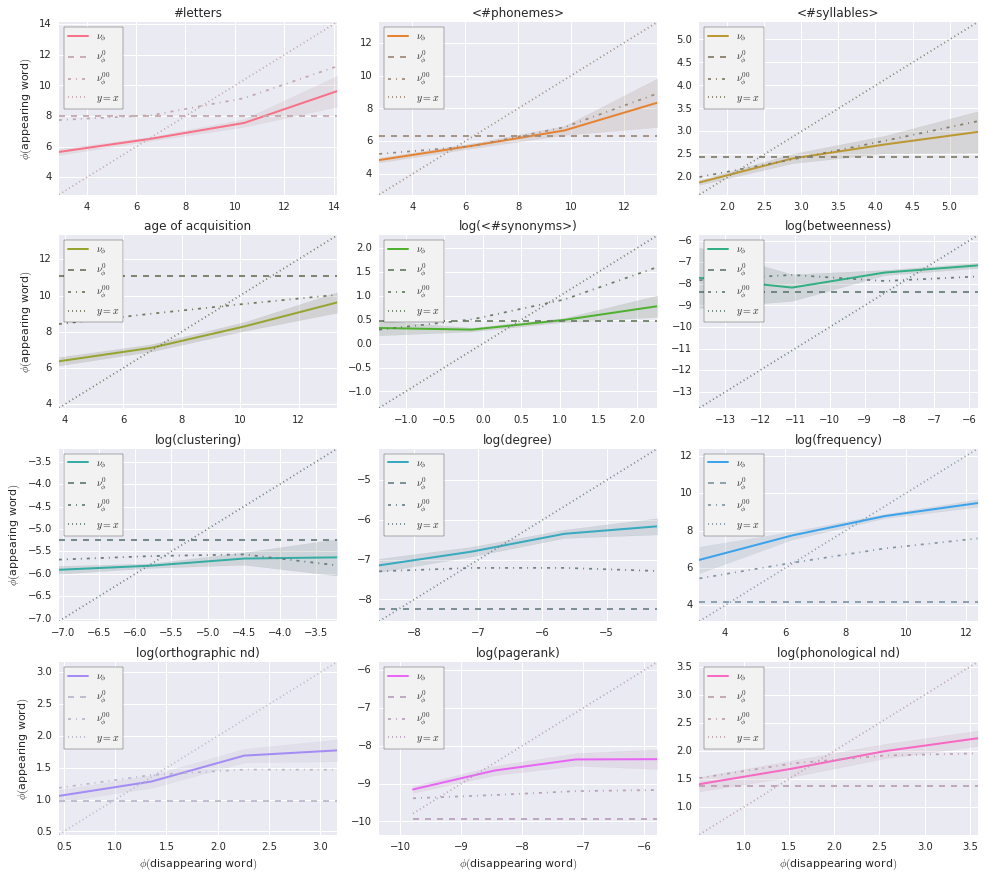

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

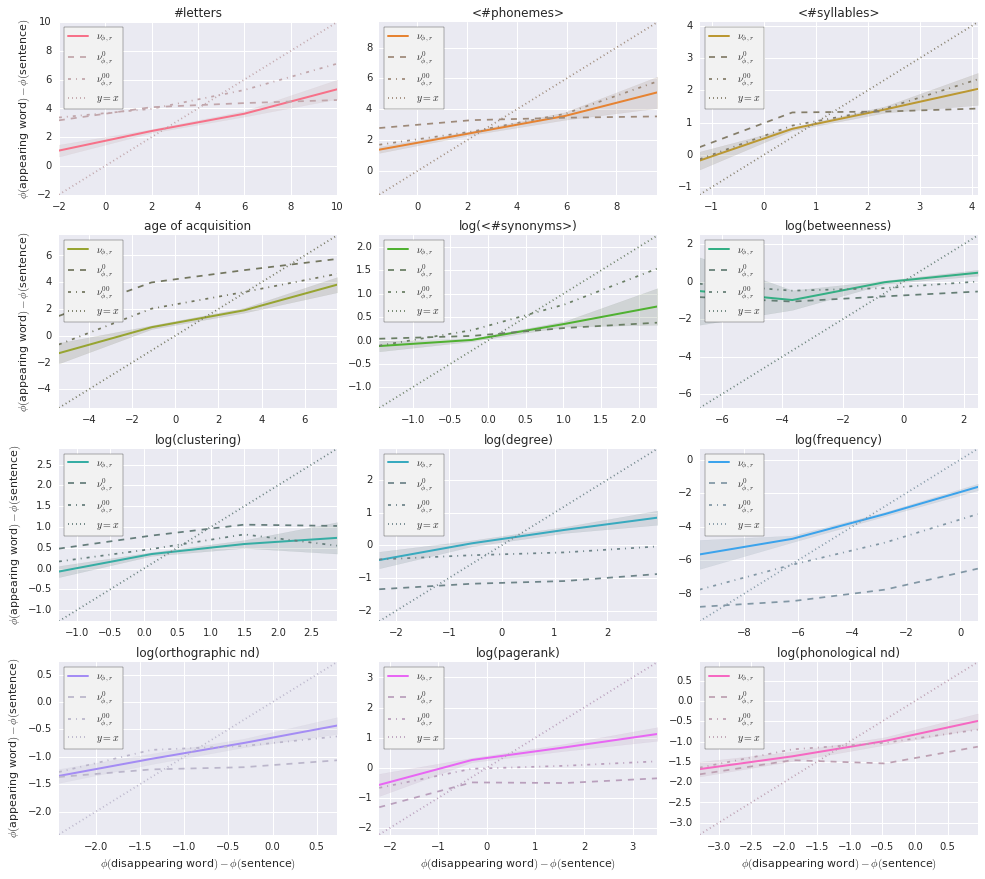

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

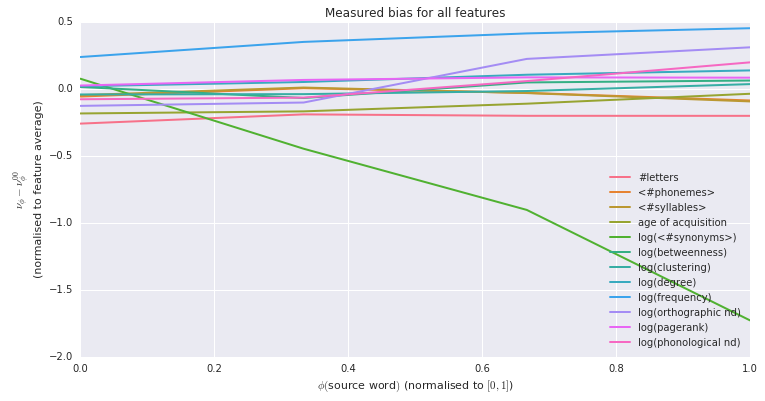

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

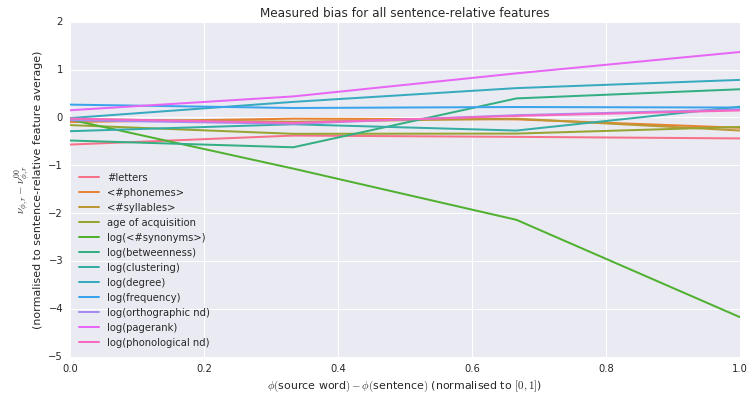

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

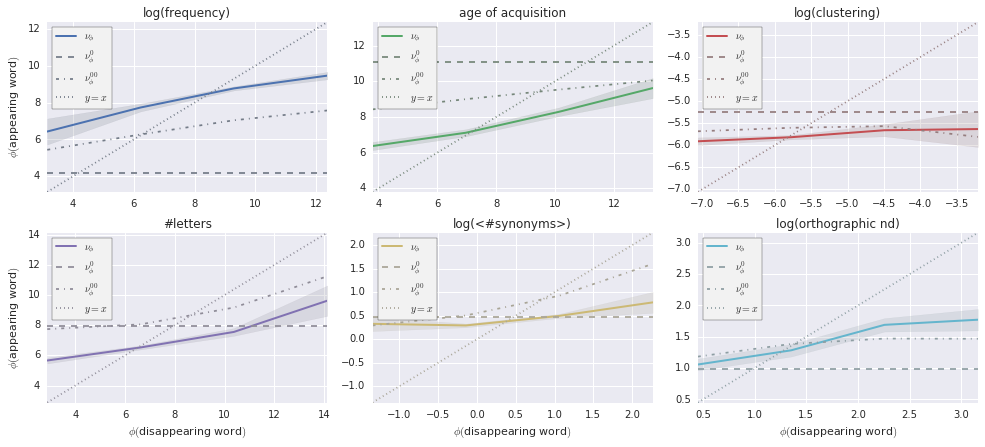

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

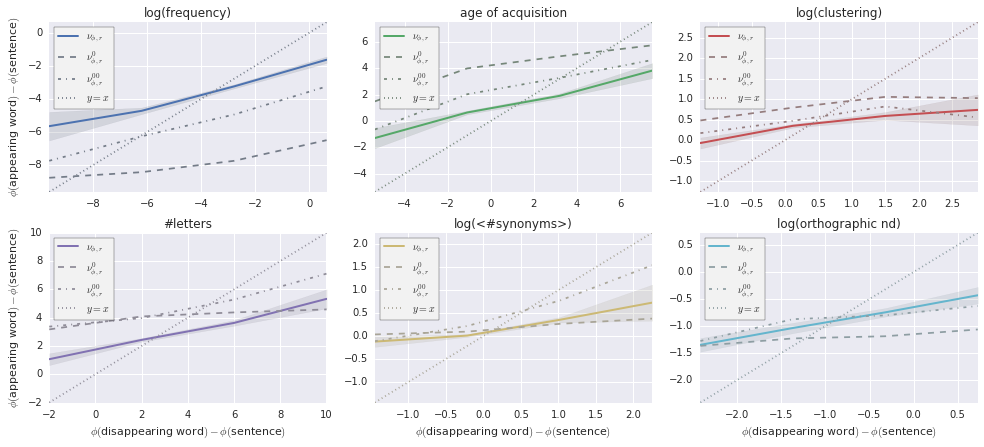

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

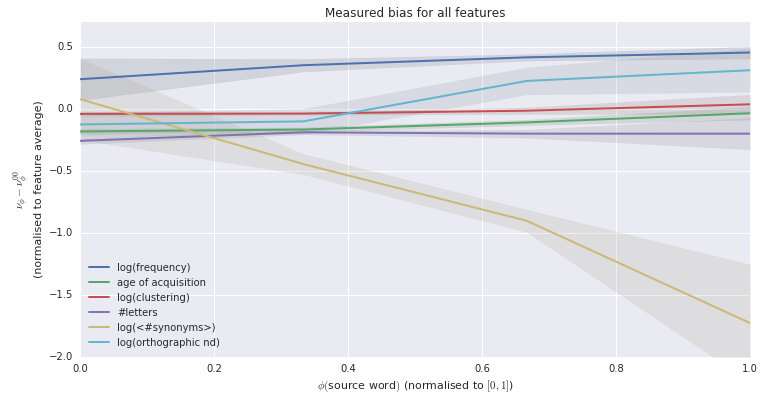

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

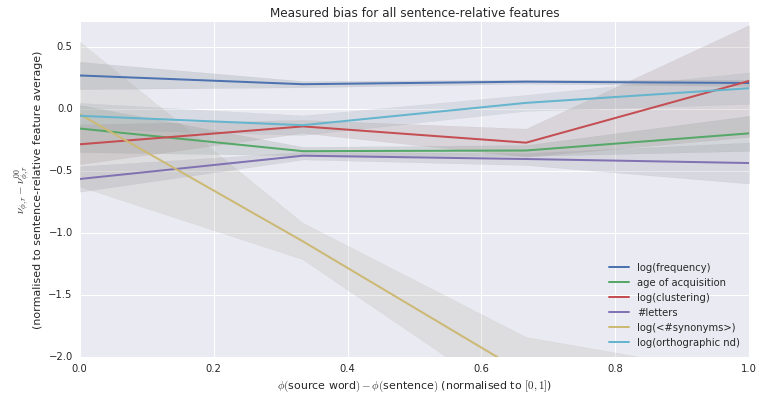

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


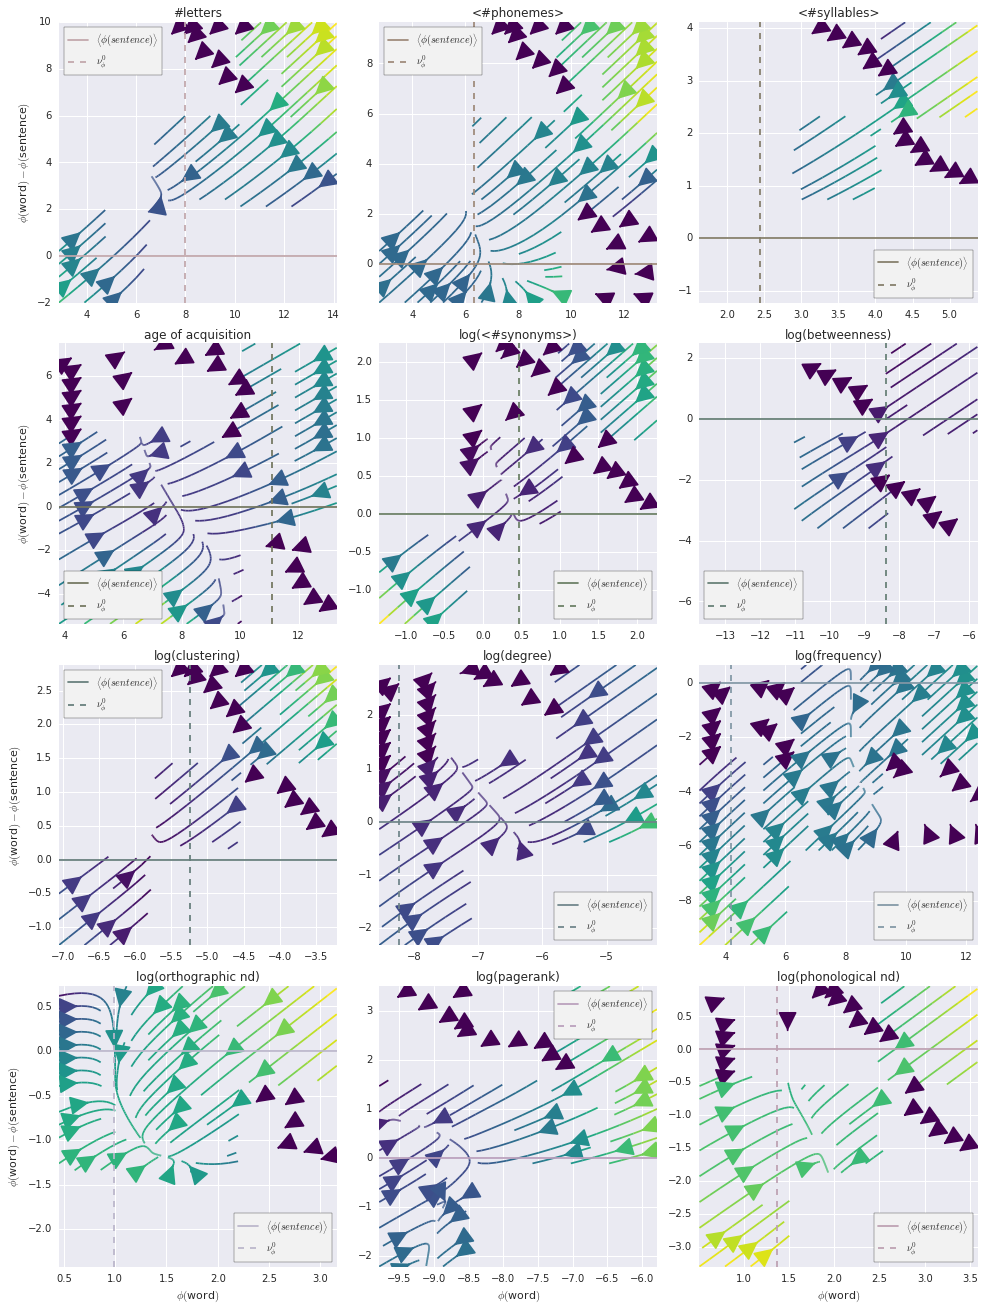

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


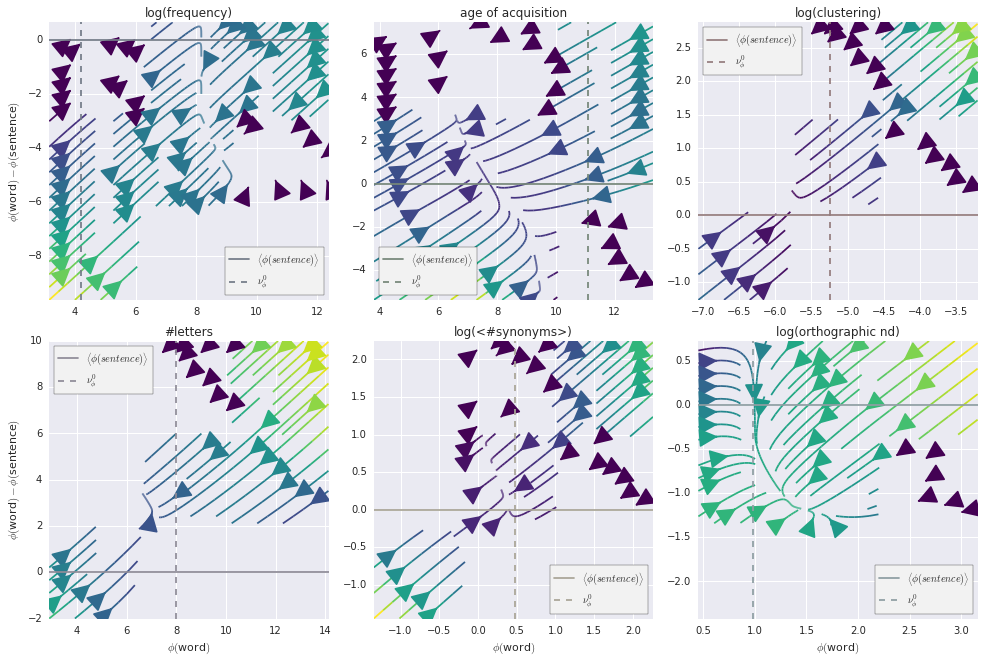

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.53585426  0.17196744  0.0800157   0.07403219  0.03308695  0.03050467
  0.01882554  0.0182441   0.01642731  0.00892288]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.454361,0.274298,-0.085246,0.242185,0.239220,-0.443289,0.212120,0.281639,-0.415397,0.276683,-0.158868,0.000960
Component-1,-0.322744,0.386509,-0.139959,0.290928,0.285721,0.432630,-0.166047,0.304540,0.419882,-0.221738,0.166149,-0.004903
Component-2,-0.798262,-0.403846,0.160966,-0.140690,-0.344519,0.109374,-0.010942,-0.092213,0.037005,-0.102876,0.007247,0.051946


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 24139) |          | Elapsed Time: 0:00:44 ETA:  12 days, 11:03:48

  0% (  104 of 24139) |                    | Elapsed Time: 0:00:45 ETA:  0:03:09

  0% (  219 of 24139) |                    | Elapsed Time: 0:00:46 ETA:  0:02:56

  1% (  302 of 24139) |                    | Elapsed Time: 0:00:47 ETA:  0:02:52

  1% (  422 of 24139) |                    | Elapsed Time: 0:00:48 ETA:  0:02:46

  2% (  533 of 24139) |                    | Elapsed Time: 0:00:49 ETA:  0:02:46

  2% (  604 of 24139) |                    | Elapsed Time: 0:00:50 ETA:  0:02:47

  2% (  708 of 24139) |                    | Elapsed Time: 0:00:51 ETA:  0:02:48

  3% (  825 of 24139) |                    | Elapsed Time: 0:00:52 ETA:  0:02:45

  3% (  906 of 24139) |                    | Elapsed Time: 0:00:52 ETA:  0:02:47

  4% (  984 of 24139) |                    | Elapsed Time: 0:00:53 ETA:  0:02:52

  4% ( 1081 of 24139) |                    | Elapsed Time: 0:00:54 ETA:  0:02:56

  4% ( 1178 of 24139) |                    | Elapsed Time: 0:00:55 ETA:  0:02:59

  5% ( 1207 of 24139) |#                   | Elapsed Time: 0:00:56 ETA:  0:03:06

  5% ( 1296 of 24139) |#                   | Elapsed Time: 0:00:57 ETA:  0:03:12

  5% ( 1405 of 24139) |#                   | Elapsed Time: 0:00:58 ETA:  0:03:09

  6% ( 1509 of 24139) |#                   | Elapsed Time: 0:00:59 ETA:  0:03:05

  6% ( 1626 of 24139) |#                   | Elapsed Time: 0:01:00 ETA:  0:03:04

  7% ( 1726 of 24139) |#                   | Elapsed Time: 0:01:01 ETA:  0:03:02

  7% ( 1811 of 24139) |#                   | Elapsed Time: 0:01:02 ETA:  0:02:59

  7% ( 1919 of 24139) |#                   | Elapsed Time: 0:01:03 ETA:  0:02:55

  8% ( 2004 of 24139) |#                   | Elapsed Time: 0:01:04 ETA:  0:02:57

  8% ( 2113 of 24139) |#                   | Elapsed Time: 0:01:05 ETA:  0:02:49

  9% ( 2208 of 24139) |#                   | Elapsed Time: 0:01:06 ETA:  0:02:46

  9% ( 2313 of 24139) |#                   | Elapsed Time: 0:01:07 ETA:  0:02:46

 10% ( 2414 of 24139) |##                  | Elapsed Time: 0:01:08 ETA:  0:02:58

 10% ( 2498 of 24139) |##                  | Elapsed Time: 0:01:09 ETA:  0:03:02

 10% ( 2564 of 24139) |##                  | Elapsed Time: 0:01:10 ETA:  0:03:08

 10% ( 2639 of 24139) |##                  | Elapsed Time: 0:01:11 ETA:  0:03:19

 11% ( 2716 of 24139) |##                  | Elapsed Time: 0:01:12 ETA:  0:03:17

 11% ( 2822 of 24139) |##                  | Elapsed Time: 0:01:13 ETA:  0:03:22

 12% ( 2938 of 24139) |##                  | Elapsed Time: 0:01:14 ETA:  0:03:13

 12% ( 3018 of 24139) |##                  | Elapsed Time: 0:01:14 ETA:  0:03:13

 13% ( 3143 of 24139) |##                  | Elapsed Time: 0:01:15 ETA:  0:02:59

 13% ( 3254 of 24139) |##                  | Elapsed Time: 0:01:16 ETA:  0:02:52

 13% ( 3320 of 24139) |##                  | Elapsed Time: 0:01:17 ETA:  0:02:51

 14% ( 3421 of 24139) |##                  | Elapsed Time: 0:01:18 ETA:  0:02:40

 14% ( 3523 of 24139) |##                  | Elapsed Time: 0:01:19 ETA:  0:02:32

 15% ( 3621 of 24139) |###                 | Elapsed Time: 0:01:20 ETA:  0:02:27

 15% ( 3748 of 24139) |###                 | Elapsed Time: 0:01:21 ETA:  0:02:21

 15% ( 3849 of 24139) |###                 | Elapsed Time: 0:01:22 ETA:  0:02:24

 16% ( 3923 of 24139) |###                 | Elapsed Time: 0:01:23 ETA:  0:02:23

 16% ( 4043 of 24139) |###                 | Elapsed Time: 0:01:24 ETA:  0:02:23

 17% ( 4142 of 24139) |###                 | Elapsed Time: 0:01:25 ETA:  0:02:25

 17% ( 4225 of 24139) |###                 | Elapsed Time: 0:01:26 ETA:  0:02:29

 17% ( 4345 of 24139) |###                 | Elapsed Time: 0:01:27 ETA:  0:02:22

 18% ( 4466 of 24139) |###                 | Elapsed Time: 0:01:28 ETA:  0:02:16

 18% ( 4527 of 24139) |###                 | Elapsed Time: 0:01:29 ETA:  0:02:20

 19% ( 4635 of 24139) |###                 | Elapsed Time: 0:01:30 ETA:  0:02:17

 19% ( 4742 of 24139) |###                 | Elapsed Time: 0:01:31 ETA:  0:02:16

 20% ( 4828 of 24139) |####                | Elapsed Time: 0:01:31 ETA:  0:02:16

 20% ( 4940 of 24139) |####                | Elapsed Time: 0:01:32 ETA:  0:02:12

 20% ( 5018 of 24139) |####                | Elapsed Time: 0:01:33 ETA:  0:02:07

 21% ( 5130 of 24139) |####                | Elapsed Time: 0:01:34 ETA:  0:02:08

 21% ( 5237 of 24139) |####                | Elapsed Time: 0:01:35 ETA:  0:02:11

 22% ( 5359 of 24139) |####                | Elapsed Time: 0:01:36 ETA:  0:02:08

 22% ( 5432 of 24139) |####                | Elapsed Time: 0:01:37 ETA:  0:02:08

 22% ( 5541 of 24139) |####                | Elapsed Time: 0:01:38 ETA:  0:02:06

 23% ( 5642 of 24139) |####                | Elapsed Time: 0:01:39 ETA:  0:02:10

 23% ( 5734 of 24139) |####                | Elapsed Time: 0:01:40 ETA:  0:02:09

 24% ( 5851 of 24139) |####                | Elapsed Time: 0:01:41 ETA:  0:01:57

 24% ( 5955 of 24139) |####                | Elapsed Time: 0:01:42 ETA:  0:01:59

 25% ( 6035 of 24139) |#####               | Elapsed Time: 0:01:43 ETA:  0:01:57

 25% ( 6124 of 24139) |#####               | Elapsed Time: 0:01:44 ETA:  0:02:01

 25% ( 6210 of 24139) |#####               | Elapsed Time: 0:01:45 ETA:  0:02:09

 26% ( 6337 of 24139) |#####               | Elapsed Time: 0:01:46 ETA:  0:02:07

 26% ( 6434 of 24139) |#####               | Elapsed Time: 0:01:47 ETA:  0:02:07

 27% ( 6545 of 24139) |#####               | Elapsed Time: 0:01:48 ETA:  0:02:06

 27% ( 6639 of 24139) |#####               | Elapsed Time: 0:01:49 ETA:  0:02:17

 27% ( 6722 of 24139) |#####               | Elapsed Time: 0:01:50 ETA:  0:02:25

 28% ( 6827 of 24139) |#####               | Elapsed Time: 0:01:51 ETA:  0:02:18

 28% ( 6940 of 24139) |#####               | Elapsed Time: 0:01:52 ETA:  0:02:13

 29% ( 7051 of 24139) |#####               | Elapsed Time: 0:01:53 ETA:  0:02:09

 29% ( 7168 of 24139) |#####               | Elapsed Time: 0:01:54 ETA:  0:02:02

 30% ( 7242 of 24139) |######              | Elapsed Time: 0:01:55 ETA:  0:02:05

 30% ( 7338 of 24139) |######              | Elapsed Time: 0:01:56 ETA:  0:02:01

 30% ( 7445 of 24139) |######              | Elapsed Time: 0:01:57 ETA:  0:01:57

 31% ( 7544 of 24139) |######              | Elapsed Time: 0:01:58 ETA:  0:01:53

 31% ( 7656 of 24139) |######              | Elapsed Time: 0:01:59 ETA:  0:01:51

 32% ( 7774 of 24139) |######              | Elapsed Time: 0:02:00 ETA:  0:01:46

 32% ( 7846 of 24139) |######              | Elapsed Time: 0:02:00 ETA:  0:01:46

 32% ( 7951 of 24139) |######              | Elapsed Time: 0:02:01 ETA:  0:01:48

 33% ( 8054 of 24139) |######              | Elapsed Time: 0:02:02 ETA:  0:01:46

 33% ( 8147 of 24139) |######              | Elapsed Time: 0:02:03 ETA:  0:01:44

 34% ( 8245 of 24139) |######              | Elapsed Time: 0:02:04 ETA:  0:01:46

 34% ( 8349 of 24139) |######              | Elapsed Time: 0:02:05 ETA:  0:01:42

 35% ( 8449 of 24139) |#######             | Elapsed Time: 0:02:06 ETA:  0:01:42

 35% ( 8552 of 24139) |#######             | Elapsed Time: 0:02:07 ETA:  0:01:43

 35% ( 8659 of 24139) |#######             | Elapsed Time: 0:02:08 ETA:  0:01:45

 36% ( 8727 of 24139) |#######             | Elapsed Time: 0:02:09 ETA:  0:01:55

 36% ( 8751 of 24139) |#######             | Elapsed Time: 0:02:10 ETA:  0:01:56

 36% ( 8864 of 24139) |#######             | Elapsed Time: 0:02:11 ETA:  0:01:52

 37% ( 8977 of 24139) |#######             | Elapsed Time: 0:02:12 ETA:  0:01:48

 37% ( 9053 of 24139) |#######             | Elapsed Time: 0:02:12 ETA:  0:01:46

 37% ( 9168 of 24139) |#######             | Elapsed Time: 0:02:13 ETA:  0:01:42

 38% ( 9288 of 24139) |#######             | Elapsed Time: 0:02:14 ETA:  0:01:36

 38% ( 9354 of 24139) |#######             | Elapsed Time: 0:02:15 ETA:  0:01:33

 39% ( 9460 of 24139) |#######             | Elapsed Time: 0:02:16 ETA:  0:01:31

 39% ( 9566 of 24139) |#######             | Elapsed Time: 0:02:17 ETA:  0:01:20

 40% ( 9656 of 24139) |########            | Elapsed Time: 0:02:18 ETA:  0:01:19

 40% ( 9750 of 24139) |########            | Elapsed Time: 0:02:19 ETA:  0:01:23

 40% ( 9842 of 24139) |########            | Elapsed Time: 0:02:20 ETA:  0:01:28

 41% ( 9958 of 24139) |########            | Elapsed Time: 0:02:21 ETA:  0:01:26

 41% (10058 of 24139) |########            | Elapsed Time: 0:02:22 ETA:  0:01:31

 42% (10160 of 24139) |########            | Elapsed Time: 0:02:23 ETA:  0:01:33

 42% (10260 of 24139) |########            | Elapsed Time: 0:02:24 ETA:  0:01:30

 42% (10374 of 24139) |########            | Elapsed Time: 0:02:25 ETA:  0:01:27

 43% (10477 of 24139) |########            | Elapsed Time: 0:02:26 ETA:  0:01:28

 43% (10561 of 24139) |########            | Elapsed Time: 0:02:26 ETA:  0:01:19

 44% (10627 of 24139) |########            | Elapsed Time: 0:02:27 ETA:  0:01:25

 44% (10720 of 24139) |########            | Elapsed Time: 0:02:28 ETA:  0:01:29

 44% (10827 of 24139) |########            | Elapsed Time: 0:02:29 ETA:  0:01:28

 45% (10863 of 24139) |#########           | Elapsed Time: 0:02:30 ETA:  0:01:25

 45% (10963 of 24139) |#########           | Elapsed Time: 0:02:31 ETA:  0:01:25

 45% (11048 of 24139) |#########           | Elapsed Time: 0:02:32 ETA:  0:01:32

 46% (11165 of 24139) |#########           | Elapsed Time: 0:02:33 ETA:  0:01:35

 46% (11295 of 24139) |#########           | Elapsed Time: 0:02:34 ETA:  0:01:31

 47% (11408 of 24139) |#########           | Elapsed Time: 0:02:35 ETA:  0:01:15

 47% (11467 of 24139) |#########           | Elapsed Time: 0:02:36 ETA:  0:01:15

 47% (11573 of 24139) |#########           | Elapsed Time: 0:02:37 ETA:  0:01:15

 48% (11690 of 24139) |#########           | Elapsed Time: 0:02:38 ETA:  0:01:11

 48% (11768 of 24139) |#########           | Elapsed Time: 0:02:38 ETA:  0:01:05

 49% (11874 of 24139) |#########           | Elapsed Time: 0:02:39 ETA:  0:00:59

 49% (11950 of 24139) |#########           | Elapsed Time: 0:02:40 ETA:  0:01:06

 50% (12070 of 24139) |##########          | Elapsed Time: 0:02:41 ETA:  0:01:01

 50% (12173 of 24139) |##########          | Elapsed Time: 0:02:42 ETA:  0:01:07

 50% (12292 of 24139) |##########          | Elapsed Time: 0:02:43 ETA:  0:01:05

 51% (12372 of 24139) |##########          | Elapsed Time: 0:02:44 ETA:  0:00:58

 51% (12474 of 24139) |##########          | Elapsed Time: 0:02:45 ETA:  0:00:58

 52% (12577 of 24139) |##########          | Elapsed Time: 0:02:46 ETA:  0:01:00

 52% (12673 of 24139) |##########          | Elapsed Time: 0:02:47 ETA:  0:01:00

 52% (12767 of 24139) |##########          | Elapsed Time: 0:02:48 ETA:  0:01:02

 53% (12863 of 24139) |##########          | Elapsed Time: 0:02:49 ETA:  0:00:56

 53% (12975 of 24139) |##########          | Elapsed Time: 0:02:50 ETA:  0:00:59

 54% (13075 of 24139) |##########          | Elapsed Time: 0:02:51 ETA:  0:01:03

 54% (13177 of 24139) |##########          | Elapsed Time: 0:02:52 ETA:  0:01:05

 55% (13277 of 24139) |###########         | Elapsed Time: 0:02:53 ETA:  0:01:06

 55% (13399 of 24139) |###########         | Elapsed Time: 0:02:54 ETA:  0:01:03

 55% (13508 of 24139) |###########         | Elapsed Time: 0:02:55 ETA:  0:00:57

 56% (13579 of 24139) |###########         | Elapsed Time: 0:02:56 ETA:  0:00:54

 56% (13686 of 24139) |###########         | Elapsed Time: 0:02:57 ETA:  0:00:51

 57% (13783 of 24139) |###########         | Elapsed Time: 0:02:58 ETA:  0:00:53

 57% (13880 of 24139) |###########         | Elapsed Time: 0:02:59 ETA:  0:00:49

 58% (14007 of 24139) |###########         | Elapsed Time: 0:03:00 ETA:  0:00:41

 58% (14116 of 24139) |###########         | Elapsed Time: 0:03:01 ETA:  0:00:37

 58% (14182 of 24139) |###########         | Elapsed Time: 0:03:01 ETA:  0:00:35

 59% (14295 of 24139) |###########         | Elapsed Time: 0:03:02 ETA:  0:00:36

 59% (14418 of 24139) |###########         | Elapsed Time: 0:03:03 ETA:  0:00:32

 60% (14484 of 24139) |############        | Elapsed Time: 0:03:04 ETA:  0:00:30

 60% (14597 of 24139) |############        | Elapsed Time: 0:03:05 ETA:  0:00:27

 60% (14723 of 24139) |############        | Elapsed Time: 0:03:06 ETA:  0:00:20

 61% (14786 of 24139) |############        | Elapsed Time: 0:03:06 ETA:  0:00:16

 61% (14902 of 24139) |############        | Elapsed Time: 0:03:07 ETA:  0:00:17

 62% (15002 of 24139) |############        | Elapsed Time: 0:03:08 ETA:  0:00:18

 62% (15087 of 24139) |############        | Elapsed Time: 0:03:09 ETA:  0:00:23

 62% (15177 of 24139) |############        | Elapsed Time: 0:03:10 ETA:  0:00:27

 63% (15284 of 24139) |############        | Elapsed Time: 0:03:11 ETA:  0:00:30

 63% (15389 of 24139) |############        | Elapsed Time: 0:03:12 ETA:  0:00:27

 64% (15494 of 24139) |############        | Elapsed Time: 0:03:13 ETA:  0:00:28

 64% (15603 of 24139) |############        | Elapsed Time: 0:03:14 ETA:  0:00:32

 65% (15691 of 24139) |#############       | Elapsed Time: 0:03:15 ETA:  0:00:33

 65% (15810 of 24139) |#############       | Elapsed Time: 0:03:16 ETA:  0:00:31

 65% (15913 of 24139) |#############       | Elapsed Time: 0:03:17 ETA:  0:00:29

 66% (15993 of 24139) |#############       | Elapsed Time: 0:03:17 ETA:  0:00:26

 66% (16094 of 24139) |#############       | Elapsed Time: 0:03:18 ETA:  0:00:22

 67% (16205 of 24139) |#############       | Elapsed Time: 0:03:19 ETA:  0:00:20

 67% (16294 of 24139) |#############       | Elapsed Time: 0:03:20 ETA:  0:00:20

 67% (16404 of 24139) |#############       | Elapsed Time: 0:03:21 ETA:  0:00:18

 68% (16533 of 24139) |#############       | Elapsed Time: 0:03:22 ETA:  0:00:12

 68% (16596 of 24139) |#############       | Elapsed Time: 0:03:23 ETA:  0:00:14

 69% (16686 of 24139) |#############       | Elapsed Time: 0:03:24 ETA:  0:00:20

 69% (16796 of 24139) |#############       | Elapsed Time: 0:03:25 ETA:  0:00:17

 70% (16898 of 24139) |##############      | Elapsed Time: 0:03:26 ETA:  0:00:19

 70% (17005 of 24139) |##############      | Elapsed Time: 0:03:27 ETA:  0:00:19

 70% (17118 of 24139) |##############      | Elapsed Time: 0:03:28 ETA:  0:00:19

 71% (17200 of 24139) |##############      | Elapsed Time: 0:03:29 ETA:  0:00:19

 71% (17310 of 24139) |##############      | Elapsed Time: 0:03:30 ETA:  0:00:24

 72% (17429 of 24139) |##############      | Elapsed Time: 0:03:31 ETA:  0:00:18

 72% (17501 of 24139) |##############      | Elapsed Time: 0:03:32 ETA:  0:00:24

 72% (17601 of 24139) |##############      | Elapsed Time: 0:03:33 ETA:  0:00:21

 73% (17706 of 24139) |##############      | Elapsed Time: 0:03:34 ETA:  0:00:18

 73% (17803 of 24139) |##############      | Elapsed Time: 0:03:34 ETA:  0:00:11

 74% (17924 of 24139) |##############      | Elapsed Time: 0:03:35 ETA:  0:00:08

 74% (18034 of 24139) |##############      | Elapsed Time: 0:03:37 ETA:  0:00:07

 75% (18105 of 24139) |###############     | Elapsed Time: 0:03:37 ETA:  0:00:09

 75% (18201 of 24139) |###############     | Elapsed Time: 0:03:38 ETA:  0:00:15

 75% (18285 of 24139) |###############     | Elapsed Time: 0:03:39 ETA:  0:00:10

 76% (18380 of 24139) |###############     | Elapsed Time: 0:03:40 ETA:  0:00:12

 76% (18406 of 24139) |###############     | Elapsed Time: 0:03:40 ETA:  0:00:09

 76% (18500 of 24139) |###############     | Elapsed Time: 0:03:41 ETA:  0:00:11

 77% (18611 of 24139) |###############     | Elapsed Time: 0:03:42 ETA:  0:00:15

 77% (18708 of 24139) |###############     | Elapsed Time: 0:03:43 ETA:  0:00:19

 77% (18823 of 24139) |###############     | Elapsed Time: 0:03:44 ETA:  0:00:17

 78% (18938 of 24139) |###############     | Elapsed Time: 0:03:45 ETA:  0:00:10

 78% (19010 of 24139) |###############     | Elapsed Time: 0:03:46 ETA:  0:00:08

 78% (19038 of 24139) |###############     | Elapsed Time: 0:03:50 ETA:  0:02:01

 79% (19125 of 24139) |###############     | Elapsed Time: 0:03:51 ETA:  0:02:04

 79% (19231 of 24139) |###############     | Elapsed Time: 0:03:52 ETA:  0:01:52

 80% (19312 of 24139) |################    | Elapsed Time: 0:03:53 ETA:  0:01:49

 80% (19433 of 24139) |################    | Elapsed Time: 0:03:54 ETA:  0:01:44

 80% (19535 of 24139) |################    | Elapsed Time: 0:03:55 ETA:  0:01:43

 81% (19613 of 24139) |################    | Elapsed Time: 0:03:56 ETA:  0:01:51

 81% (19728 of 24139) |################    | Elapsed Time: 0:03:57 ETA:  0:01:50

 82% (19838 of 24139) |################    | Elapsed Time: 0:03:58 ETA:  0:01:41

 82% (19915 of 24139) |################    | Elapsed Time: 0:03:59 ETA:  0:00:00

 82% (20020 of 24139) |################    | Elapsed Time: 0:04:00 ETA:  0:00:00

 83% (20128 of 24139) |################    | Elapsed Time: 0:04:01 ETA:  0:00:00

 83% (20217 of 24139) |################    | Elapsed Time: 0:04:01 ETA:  0:00:00

 84% (20324 of 24139) |################    | Elapsed Time: 0:04:02 ETA:  0:00:00

 84% (20429 of 24139) |################    | Elapsed Time: 0:04:03 ETA:  0:00:00

 85% (20519 of 24139) |#################   | Elapsed Time: 0:04:04 ETA:  0:00:00

 85% (20618 of 24139) |#################   | Elapsed Time: 0:04:05 ETA:  0:00:00

 85% (20725 of 24139) |#################   | Elapsed Time: 0:04:06 ETA:  0:00:00

 86% (20820 of 24139) |#################   | Elapsed Time: 0:04:07 ETA:  0:00:00

 86% (20912 of 24139) |#################   | Elapsed Time: 0:04:08 ETA:  0:00:00

 87% (21010 of 24139) |#################   | Elapsed Time: 0:04:09 ETA:  0:00:00

 87% (21122 of 24139) |#################   | Elapsed Time: 0:04:10 ETA:  0:00:00

 87% (21215 of 24139) |#################   | Elapsed Time: 0:04:11 ETA:  0:00:00

 88% (21307 of 24139) |#################   | Elapsed Time: 0:04:12 ETA:  0:00:00

 88% (21424 of 24139) |#################   | Elapsed Time: 0:04:13 ETA:  0:00:00

 89% (21531 of 24139) |#################   | Elapsed Time: 0:04:14 ETA:  0:00:00

 89% (21618 of 24139) |#################   | Elapsed Time: 0:04:15 ETA:  0:00:00

 90% (21726 of 24139) |##################  | Elapsed Time: 0:04:16 ETA:  0:00:00

 90% (21815 of 24139) |##################  | Elapsed Time: 0:04:17 ETA:  0:00:00

 90% (21895 of 24139) |##################  | Elapsed Time: 0:04:18 ETA:  0:00:00

 91% (21995 of 24139) |##################  | Elapsed Time: 0:04:19 ETA:  0:00:00

 91% (22027 of 24139) |##################  | Elapsed Time: 0:04:20 ETA:  0:00:00

 91% (22139 of 24139) |##################  | Elapsed Time: 0:04:21 ETA:  0:00:00

 92% (22261 of 24139) |##################  | Elapsed Time: 0:04:22 ETA:  0:00:00

 92% (22329 of 24139) |##################  | Elapsed Time: 0:04:22 ETA:  0:00:00

 92% (22448 of 24139) |##################  | Elapsed Time: 0:04:23 ETA:  0:00:00

 93% (22533 of 24139) |##################  | Elapsed Time: 0:04:24 ETA:  0:00:00

 93% (22631 of 24139) |##################  | Elapsed Time: 0:04:25 ETA:  0:00:00

 94% (22744 of 24139) |##################  | Elapsed Time: 0:04:26 ETA:  0:00:00

 94% (22853 of 24139) |##################  | Elapsed Time: 0:04:27 ETA:  0:00:00

 95% (22933 of 24139) |################### | Elapsed Time: 0:04:28 ETA:  0:00:00

 95% (23039 of 24139) |################### | Elapsed Time: 0:04:29 ETA:  0:00:00

 95% (23163 of 24139) |################### | Elapsed Time: 0:04:30 ETA:  0:00:00

 96% (23234 of 24139) |################### | Elapsed Time: 0:04:31 ETA:  0:00:00

 96% (23354 of 24139) |################### | Elapsed Time: 0:04:32 ETA:  0:00:00

 97% (23457 of 24139) |################### | Elapsed Time: 0:04:33 ETA:  0:00:00

 97% (23536 of 24139) |################### | Elapsed Time: 0:04:33 ETA:  0:00:00

 97% (23632 of 24139) |################### | Elapsed Time: 0:04:34 ETA:  0:00:00

 98% (23727 of 24139) |################### | Elapsed Time: 0:04:35 ETA:  0:00:00

 98% (23838 of 24139) |################### | Elapsed Time: 0:04:36 ETA:  0:00:00

 99% (23944 of 24139) |################### | Elapsed Time: 0:04:37 ETA:  0:00:00

 99% (24063 of 24139) |################### | Elapsed Time: 0:04:38 ETA:  0:00:00

100% (24139 of 24139) |####################| Elapsed Time: 0:04:39 Time: 0:04:39


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

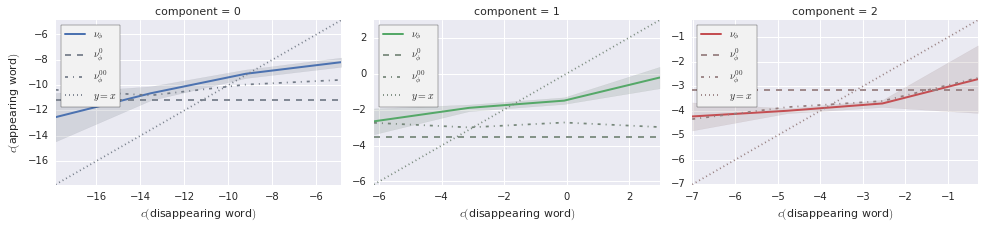

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 3 components.

Those explain the following variance:
[ 0.56591948  0.18536586  0.14296392]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographic_density,synonyms_count
Component-0,-0.682047,-0.103919,0.358625,-0.566064,0.273786,0.003732
Component-1,-0.409001,-0.113192,0.504280,0.699401,-0.276431,0.005650
Component-2,0.600434,-0.122219,0.760874,-0.205932,0.027644,-0.049402


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 24139) |           | Elapsed Time: 0:00:13 ETA:  3 days, 17:23:25

  0% (  107 of 24139) |                    | Elapsed Time: 0:00:14 ETA:  0:03:34

  0% (  234 of 24139) |                    | Elapsed Time: 0:00:15 ETA:  0:03:12

  1% (  302 of 24139) |                    | Elapsed Time: 0:00:15 ETA:  0:03:12

  1% (  417 of 24139) |                    | Elapsed Time: 0:00:16 ETA:  0:03:12

  2% (  539 of 24139) |                    | Elapsed Time: 0:00:17 ETA:  0:03:08

  2% (  604 of 24139) |                    | Elapsed Time: 0:00:18 ETA:  0:03:07

  2% (  722 of 24139) |                    | Elapsed Time: 0:00:19 ETA:  0:03:06

  3% (  856 of 24139) |                    | Elapsed Time: 0:00:20 ETA:  0:03:01

  3% (  906 of 24139) |                    | Elapsed Time: 0:00:20 ETA:  0:03:02

  4% ( 1001 of 24139) |                    | Elapsed Time: 0:00:21 ETA:  0:03:03

  4% ( 1119 of 24139) |                    | Elapsed Time: 0:00:22 ETA:  0:03:05

  5% ( 1207 of 24139) |#                   | Elapsed Time: 0:00:23 ETA:  0:03:07

  5% ( 1331 of 24139) |#                   | Elapsed Time: 0:00:24 ETA:  0:03:04

  6% ( 1471 of 24139) |#                   | Elapsed Time: 0:00:25 ETA:  0:02:59

  6% ( 1509 of 24139) |#                   | Elapsed Time: 0:00:26 ETA:  0:02:58

  6% ( 1633 of 24139) |#                   | Elapsed Time: 0:00:27 ETA:  0:02:56

  7% ( 1737 of 24139) |#                   | Elapsed Time: 0:00:28 ETA:  0:03:01

  7% ( 1811 of 24139) |#                   | Elapsed Time: 0:00:28 ETA:  0:03:01

  8% ( 1936 of 24139) |#                   | Elapsed Time: 0:00:29 ETA:  0:02:54

  8% ( 2060 of 24139) |#                   | Elapsed Time: 0:00:30 ETA:  0:02:51

  8% ( 2113 of 24139) |#                   | Elapsed Time: 0:00:31 ETA:  0:02:44

  9% ( 2245 of 24139) |#                   | Elapsed Time: 0:00:32 ETA:  0:02:42

  9% ( 2376 of 24139) |#                   | Elapsed Time: 0:00:33 ETA:  0:02:43

 10% ( 2414 of 24139) |##                  | Elapsed Time: 0:00:33 ETA:  0:02:44

 10% ( 2521 of 24139) |##                  | Elapsed Time: 0:00:34 ETA:  0:02:47

 10% ( 2608 of 24139) |##                  | Elapsed Time: 0:00:35 ETA:  0:02:50

 11% ( 2716 of 24139) |##                  | Elapsed Time: 0:00:36 ETA:  0:02:48

 11% ( 2841 of 24139) |##                  | Elapsed Time: 0:00:37 ETA:  0:02:46

 12% ( 2972 of 24139) |##                  | Elapsed Time: 0:00:38 ETA:  0:02:44

 12% ( 3018 of 24139) |##                  | Elapsed Time: 0:00:38 ETA:  0:02:46

 13% ( 3150 of 24139) |##                  | Elapsed Time: 0:00:39 ETA:  0:02:45

 13% ( 3278 of 24139) |##                  | Elapsed Time: 0:00:40 ETA:  0:02:45

 13% ( 3320 of 24139) |##                  | Elapsed Time: 0:00:41 ETA:  0:02:45

 14% ( 3440 of 24139) |##                  | Elapsed Time: 0:00:42 ETA:  0:02:41

 14% ( 3552 of 24139) |##                  | Elapsed Time: 0:00:43 ETA:  0:02:34

 15% ( 3621 of 24139) |###                 | Elapsed Time: 0:00:43 ETA:  0:02:32

 15% ( 3749 of 24139) |###                 | Elapsed Time: 0:00:44 ETA:  0:02:31

 16% ( 3864 of 24139) |###                 | Elapsed Time: 0:00:45 ETA:  0:02:33

 16% ( 3923 of 24139) |###                 | Elapsed Time: 0:00:46 ETA:  0:02:33

 16% ( 4055 of 24139) |###                 | Elapsed Time: 0:00:47 ETA:  0:02:32

 17% ( 4161 of 24139) |###                 | Elapsed Time: 0:00:48 ETA:  0:02:36

 17% ( 4225 of 24139) |###                 | Elapsed Time: 0:00:49 ETA:  0:02:40

 18% ( 4356 of 24139) |###                 | Elapsed Time: 0:00:50 ETA:  0:02:37

 18% ( 4481 of 24139) |###                 | Elapsed Time: 0:00:51 ETA:  0:02:33

 18% ( 4527 of 24139) |###                 | Elapsed Time: 0:00:51 ETA:  0:02:33

 19% ( 4641 of 24139) |###                 | Elapsed Time: 0:00:52 ETA:  0:02:35

 19% ( 4763 of 24139) |###                 | Elapsed Time: 0:00:53 ETA:  0:02:32

 20% ( 4828 of 24139) |####                | Elapsed Time: 0:00:54 ETA:  0:02:29

 20% ( 4961 of 24139) |####                | Elapsed Time: 0:00:55 ETA:  0:02:28

 20% ( 5062 of 24139) |####                | Elapsed Time: 0:00:56 ETA:  0:02:28

 21% ( 5130 of 24139) |####                | Elapsed Time: 0:00:56 ETA:  0:02:20

 21% ( 5252 of 24139) |####                | Elapsed Time: 0:00:57 ETA:  0:02:21

 22% ( 5384 of 24139) |####                | Elapsed Time: 0:00:58 ETA:  0:02:18

 22% ( 5432 of 24139) |####                | Elapsed Time: 0:00:58 ETA:  0:02:19

 23% ( 5563 of 24139) |####                | Elapsed Time: 0:00:59 ETA:  0:02:14

 23% ( 5693 of 24139) |####                | Elapsed Time: 0:01:01 ETA:  0:02:11

 23% ( 5734 of 24139) |####                | Elapsed Time: 0:01:01 ETA:  0:02:10

 24% ( 5869 of 24139) |####                | Elapsed Time: 0:01:02 ETA:  0:02:09

 24% ( 6002 of 24139) |####                | Elapsed Time: 0:01:03 ETA:  0:02:01

 25% ( 6035 of 24139) |#####               | Elapsed Time: 0:01:03 ETA:  0:02:02

 25% ( 6136 of 24139) |#####               | Elapsed Time: 0:01:04 ETA:  0:02:05

 25% ( 6262 of 24139) |#####               | Elapsed Time: 0:01:05 ETA:  0:02:06

 26% ( 6337 of 24139) |#####               | Elapsed Time: 0:01:06 ETA:  0:02:04

 26% ( 6451 of 24139) |#####               | Elapsed Time: 0:01:07 ETA:  0:02:06

 27% ( 6573 of 24139) |#####               | Elapsed Time: 0:01:08 ETA:  0:02:07

 27% ( 6639 of 24139) |#####               | Elapsed Time: 0:01:08 ETA:  0:02:14

 27% ( 6724 of 24139) |#####               | Elapsed Time: 0:01:09 ETA:  0:02:25

 28% ( 6831 of 24139) |#####               | Elapsed Time: 0:01:10 ETA:  0:02:31

 28% ( 6940 of 24139) |#####               | Elapsed Time: 0:01:11 ETA:  0:02:29

 29% ( 7054 of 24139) |#####               | Elapsed Time: 0:01:12 ETA:  0:02:25

 29% ( 7178 of 24139) |#####               | Elapsed Time: 0:01:13 ETA:  0:02:24

 30% ( 7242 of 24139) |######              | Elapsed Time: 0:01:14 ETA:  0:02:25

 30% ( 7349 of 24139) |######              | Elapsed Time: 0:01:15 ETA:  0:02:26

 30% ( 7471 of 24139) |######              | Elapsed Time: 0:01:16 ETA:  0:02:25

 31% ( 7544 of 24139) |######              | Elapsed Time: 0:01:17 ETA:  0:02:21

 31% ( 7669 of 24139) |######              | Elapsed Time: 0:01:18 ETA:  0:02:11

 32% ( 7789 of 24139) |######              | Elapsed Time: 0:01:19 ETA:  0:02:07

 32% ( 7846 of 24139) |######              | Elapsed Time: 0:01:19 ETA:  0:02:06

 32% ( 7960 of 24139) |######              | Elapsed Time: 0:01:20 ETA:  0:02:06

 33% ( 8085 of 24139) |######              | Elapsed Time: 0:01:21 ETA:  0:02:04

 33% ( 8147 of 24139) |######              | Elapsed Time: 0:01:22 ETA:  0:02:06

 34% ( 8257 of 24139) |######              | Elapsed Time: 0:01:23 ETA:  0:02:04

 34% ( 8376 of 24139) |######              | Elapsed Time: 0:01:24 ETA:  0:02:04

 35% ( 8449 of 24139) |#######             | Elapsed Time: 0:01:24 ETA:  0:02:00

 35% ( 8571 of 24139) |#######             | Elapsed Time: 0:01:25 ETA:  0:01:59

 36% ( 8695 of 24139) |#######             | Elapsed Time: 0:01:26 ETA:  0:01:58

 36% ( 8751 of 24139) |#######             | Elapsed Time: 0:01:27 ETA:  0:02:02

 36% ( 8881 of 24139) |#######             | Elapsed Time: 0:01:28 ETA:  0:01:57

 37% ( 9013 of 24139) |#######             | Elapsed Time: 0:01:29 ETA:  0:01:55

 37% ( 9053 of 24139) |#######             | Elapsed Time: 0:01:29 ETA:  0:01:53

 38% ( 9191 of 24139) |#######             | Elapsed Time: 0:01:30 ETA:  0:01:46

 38% ( 9326 of 24139) |#######             | Elapsed Time: 0:01:31 ETA:  0:01:42

 38% ( 9354 of 24139) |#######             | Elapsed Time: 0:01:32 ETA:  0:01:40

 39% ( 9480 of 24139) |#######             | Elapsed Time: 0:01:33 ETA:  0:01:38

 39% ( 9608 of 24139) |#######             | Elapsed Time: 0:01:34 ETA:  0:01:36

 40% ( 9656 of 24139) |########            | Elapsed Time: 0:01:34 ETA:  0:01:32

 40% ( 9775 of 24139) |########            | Elapsed Time: 0:01:35 ETA:  0:01:33

 40% ( 9879 of 24139) |########            | Elapsed Time: 0:01:36 ETA:  0:01:38

 41% ( 9958 of 24139) |########            | Elapsed Time: 0:01:37 ETA:  0:01:35

 41% (10079 of 24139) |########            | Elapsed Time: 0:01:38 ETA:  0:01:38

 42% (10199 of 24139) |########            | Elapsed Time: 0:01:39 ETA:  0:01:41

 42% (10260 of 24139) |########            | Elapsed Time: 0:01:39 ETA:  0:01:41

 43% (10381 of 24139) |########            | Elapsed Time: 0:01:40 ETA:  0:01:41

 43% (10503 of 24139) |########            | Elapsed Time: 0:01:41 ETA:  0:01:41

 43% (10561 of 24139) |########            | Elapsed Time: 0:01:42 ETA:  0:01:38

 44% (10655 of 24139) |########            | Elapsed Time: 0:01:43 ETA:  0:01:43

 44% (10778 of 24139) |########            | Elapsed Time: 0:01:44 ETA:  0:01:37

 45% (10863 of 24139) |#########           | Elapsed Time: 0:01:44 ETA:  0:01:37

 45% (10980 of 24139) |#########           | Elapsed Time: 0:01:45 ETA:  0:01:37

 45% (11095 of 24139) |#########           | Elapsed Time: 0:01:46 ETA:  0:01:37

 46% (11165 of 24139) |#########           | Elapsed Time: 0:01:47 ETA:  0:01:39

 46% (11307 of 24139) |#########           | Elapsed Time: 0:01:48 ETA:  0:01:33

 47% (11430 of 24139) |#########           | Elapsed Time: 0:01:49 ETA:  0:01:32

 47% (11467 of 24139) |#########           | Elapsed Time: 0:01:49 ETA:  0:01:35

 48% (11593 of 24139) |#########           | Elapsed Time: 0:01:50 ETA:  0:01:27

 48% (11727 of 24139) |#########           | Elapsed Time: 0:01:51 ETA:  0:01:24

 48% (11768 of 24139) |#########           | Elapsed Time: 0:01:52 ETA:  0:01:25

 49% (11883 of 24139) |#########           | Elapsed Time: 0:01:53 ETA:  0:01:24

 49% (11994 of 24139) |#########           | Elapsed Time: 0:01:54 ETA:  0:01:24

 50% (12070 of 24139) |##########          | Elapsed Time: 0:01:54 ETA:  0:01:19

 50% (12203 of 24139) |##########          | Elapsed Time: 0:01:55 ETA:  0:01:20

 51% (12330 of 24139) |##########          | Elapsed Time: 0:01:56 ETA:  0:01:18

 51% (12372 of 24139) |##########          | Elapsed Time: 0:01:56 ETA:  0:01:16

 51% (12497 of 24139) |##########          | Elapsed Time: 0:01:57 ETA:  0:01:15

 52% (12615 of 24139) |##########          | Elapsed Time: 0:01:58 ETA:  0:01:17

 52% (12673 of 24139) |##########          | Elapsed Time: 0:01:59 ETA:  0:01:17

 52% (12787 of 24139) |##########          | Elapsed Time: 0:02:00 ETA:  0:01:16

 53% (12901 of 24139) |##########          | Elapsed Time: 0:02:01 ETA:  0:01:15

 53% (12975 of 24139) |##########          | Elapsed Time: 0:02:02 ETA:  0:01:15

 54% (13099 of 24139) |##########          | Elapsed Time: 0:02:03 ETA:  0:01:15

 54% (13214 of 24139) |##########          | Elapsed Time: 0:02:04 ETA:  0:01:17

 55% (13277 of 24139) |###########         | Elapsed Time: 0:02:04 ETA:  0:01:14

 55% (13419 of 24139) |###########         | Elapsed Time: 0:02:05 ETA:  0:01:09

 56% (13553 of 24139) |###########         | Elapsed Time: 0:02:06 ETA:  0:01:05

 56% (13579 of 24139) |###########         | Elapsed Time: 0:02:06 ETA:  0:01:05

 56% (13706 of 24139) |###########         | Elapsed Time: 0:02:07 ETA:  0:01:01

 57% (13824 of 24139) |###########         | Elapsed Time: 0:02:08 ETA:  0:00:59

 57% (13880 of 24139) |###########         | Elapsed Time: 0:02:09 ETA:  0:00:59

 58% (14021 of 24139) |###########         | Elapsed Time: 0:02:10 ETA:  0:00:55

 58% (14182 of 24139) |###########         | Elapsed Time: 0:02:11 ETA:  0:00:52

 59% (14318 of 24139) |###########         | Elapsed Time: 0:02:12 ETA:  0:00:52

 59% (14454 of 24139) |###########         | Elapsed Time: 0:02:13 ETA:  0:00:50

 60% (14484 of 24139) |############        | Elapsed Time: 0:02:13 ETA:  0:00:50

 60% (14615 of 24139) |############        | Elapsed Time: 0:02:14 ETA:  0:00:49

 61% (14751 of 24139) |############        | Elapsed Time: 0:02:15 ETA:  0:00:44

 61% (14786 of 24139) |############        | Elapsed Time: 0:02:15 ETA:  0:00:42

 61% (14906 of 24139) |############        | Elapsed Time: 0:02:16 ETA:  0:00:45

 62% (15031 of 24139) |############        | Elapsed Time: 0:02:17 ETA:  0:00:46

 62% (15087 of 24139) |############        | Elapsed Time: 0:02:18 ETA:  0:00:46

 62% (15199 of 24139) |############        | Elapsed Time: 0:02:19 ETA:  0:00:50

 63% (15329 of 24139) |############        | Elapsed Time: 0:02:20 ETA:  0:00:50

 63% (15389 of 24139) |############        | Elapsed Time: 0:02:20 ETA:  0:00:50

 64% (15504 of 24139) |############        | Elapsed Time: 0:02:21 ETA:  0:00:52

 64% (15625 of 24139) |############        | Elapsed Time: 0:02:22 ETA:  0:00:55

 65% (15691 of 24139) |#############       | Elapsed Time: 0:02:23 ETA:  0:00:57

 65% (15811 of 24139) |#############       | Elapsed Time: 0:02:24 ETA:  0:00:56

 66% (15937 of 24139) |#############       | Elapsed Time: 0:02:25 ETA:  0:00:55

 66% (15993 of 24139) |#############       | Elapsed Time: 0:02:25 ETA:  0:00:54

 66% (16114 of 24139) |#############       | Elapsed Time: 0:02:26 ETA:  0:00:51

 67% (16243 of 24139) |#############       | Elapsed Time: 0:02:27 ETA:  0:00:50

 67% (16294 of 24139) |#############       | Elapsed Time: 0:02:28 ETA:  0:00:49

 68% (16427 of 24139) |#############       | Elapsed Time: 0:02:29 ETA:  0:00:44

 68% (16563 of 24139) |#############       | Elapsed Time: 0:02:30 ETA:  0:00:40

 68% (16596 of 24139) |#############       | Elapsed Time: 0:02:30 ETA:  0:00:38

 69% (16708 of 24139) |#############       | Elapsed Time: 0:02:31 ETA:  0:00:39

 69% (16830 of 24139) |#############       | Elapsed Time: 0:02:32 ETA:  0:00:39

 70% (16898 of 24139) |##############      | Elapsed Time: 0:02:33 ETA:  0:00:40

 70% (17032 of 24139) |##############      | Elapsed Time: 0:02:34 ETA:  0:00:36

 71% (17174 of 24139) |##############      | Elapsed Time: 0:02:35 ETA:  0:00:33

 71% (17200 of 24139) |##############      | Elapsed Time: 0:02:35 ETA:  0:00:34

 71% (17351 of 24139) |##############      | Elapsed Time: 0:02:36 ETA:  0:00:29

 72% (17466 of 24139) |##############      | Elapsed Time: 0:02:37 ETA:  0:00:33

 72% (17501 of 24139) |##############      | Elapsed Time: 0:02:37 ETA:  0:00:31

 72% (17621 of 24139) |##############      | Elapsed Time: 0:02:38 ETA:  0:00:29

 73% (17757 of 24139) |##############      | Elapsed Time: 0:02:39 ETA:  0:00:25

 73% (17803 of 24139) |##############      | Elapsed Time: 0:02:39 ETA:  0:00:20

 74% (17944 of 24139) |##############      | Elapsed Time: 0:02:40 ETA:  0:00:18

 74% (18069 of 24139) |##############      | Elapsed Time: 0:02:41 ETA:  0:00:21

 75% (18105 of 24139) |###############     | Elapsed Time: 0:02:42 ETA:  0:00:20

 75% (18214 of 24139) |###############     | Elapsed Time: 0:02:43 ETA:  0:00:28

 75% (18337 of 24139) |###############     | Elapsed Time: 0:02:44 ETA:  0:00:26

 76% (18406 of 24139) |###############     | Elapsed Time: 0:02:44 ETA:  0:00:26

 76% (18526 of 24139) |###############     | Elapsed Time: 0:02:45 ETA:  0:00:25

 77% (18662 of 24139) |###############     | Elapsed Time: 0:02:46 ETA:  0:00:24

 77% (18708 of 24139) |###############     | Elapsed Time: 0:02:47 ETA:  0:00:25

 78% (18832 of 24139) |###############     | Elapsed Time: 0:02:48 ETA:  0:00:28

 78% (18964 of 24139) |###############     | Elapsed Time: 0:02:49 ETA:  0:00:25

 78% (19010 of 24139) |###############     | Elapsed Time: 0:02:49 ETA:  0:00:24

 79% (19124 of 24139) |###############     | Elapsed Time: 0:02:50 ETA:  0:00:22

 79% (19241 of 24139) |###############     | Elapsed Time: 0:02:51 ETA:  0:00:22

 80% (19312 of 24139) |################    | Elapsed Time: 0:02:51 ETA:  0:00:22

 80% (19451 of 24139) |################    | Elapsed Time: 0:02:52 ETA:  0:00:17

 81% (19560 of 24139) |################    | Elapsed Time: 0:02:53 ETA:  0:00:22

 81% (19613 of 24139) |################    | Elapsed Time: 0:02:54 ETA:  0:00:20

 81% (19746 of 24139) |################    | Elapsed Time: 0:02:55 ETA:  0:00:17

 82% (19857 of 24139) |################    | Elapsed Time: 0:02:56 ETA:  0:00:21

 82% (19915 of 24139) |################    | Elapsed Time: 0:02:56 ETA:  0:00:22

 82% (20026 of 24139) |################    | Elapsed Time: 0:02:57 ETA:  0:00:22

 83% (20151 of 24139) |################    | Elapsed Time: 0:02:58 ETA:  0:00:19

 83% (20217 of 24139) |################    | Elapsed Time: 0:02:59 ETA:  0:00:17

 84% (20347 of 24139) |################    | Elapsed Time: 0:03:00 ETA:  0:00:18

 84% (20461 of 24139) |################    | Elapsed Time: 0:03:01 ETA:  0:00:16

 85% (20519 of 24139) |#################   | Elapsed Time: 0:03:01 ETA:  0:00:17

 85% (20639 of 24139) |#################   | Elapsed Time: 0:03:02 ETA:  0:00:19

 86% (20764 of 24139) |#################   | Elapsed Time: 0:03:03 ETA:  0:00:15

 86% (20820 of 24139) |#################   | Elapsed Time: 0:03:04 ETA:  0:00:12

 86% (20934 of 24139) |#################   | Elapsed Time: 0:03:05 ETA:  0:00:11

 87% (21073 of 24139) |#################   | Elapsed Time: 0:03:06 ETA:  0:00:07

 87% (21122 of 24139) |#################   | Elapsed Time: 0:03:06 ETA:  0:00:08

 88% (21245 of 24139) |#################   | Elapsed Time: 0:03:07 ETA:  0:00:08

 88% (21361 of 24139) |#################   | Elapsed Time: 0:03:08 ETA:  0:00:07

 88% (21424 of 24139) |#################   | Elapsed Time: 0:03:09 ETA:  0:00:07

 89% (21545 of 24139) |#################   | Elapsed Time: 0:03:10 ETA:  0:00:05

 89% (21656 of 24139) |#################   | Elapsed Time: 0:03:11 ETA:  0:00:08

 90% (21726 of 24139) |##################  | Elapsed Time: 0:03:11 ETA:  0:00:08

 90% (21841 of 24139) |##################  | Elapsed Time: 0:03:12 ETA:  0:00:07

 90% (21947 of 24139) |##################  | Elapsed Time: 0:03:13 ETA:  0:00:13

 91% (22027 of 24139) |##################  | Elapsed Time: 0:03:14 ETA:  0:00:10

 91% (22160 of 24139) |##################  | Elapsed Time: 0:03:15 ETA:  0:00:06

 92% (22298 of 24139) |##################  | Elapsed Time: 0:03:16 ETA:  0:00:01

 92% (22329 of 24139) |##################  | Elapsed Time: 0:03:16 ETA:  0:00:00

 93% (22457 of 24139) |##################  | Elapsed Time: 0:03:17 ETA:  0:00:00

 93% (22573 of 24139) |##################  | Elapsed Time: 0:03:18 ETA:  0:00:00

 93% (22631 of 24139) |##################  | Elapsed Time: 0:03:18 ETA:  0:00:00

 94% (22761 of 24139) |##################  | Elapsed Time: 0:03:19 ETA:  0:00:00

 94% (22877 of 24139) |##################  | Elapsed Time: 0:03:20 ETA:  0:00:00

 95% (22933 of 24139) |################### | Elapsed Time: 0:03:21 ETA:  0:00:00

 95% (23041 of 24139) |################### | Elapsed Time: 0:03:22 ETA:  0:00:00

 96% (23177 of 24139) |################### | Elapsed Time: 0:03:23 ETA:  0:00:00

 96% (23234 of 24139) |################### | Elapsed Time: 0:03:23 ETA:  0:00:00

 96% (23364 of 24139) |################### | Elapsed Time: 0:03:24 ETA:  0:00:00

 97% (23473 of 24139) |################### | Elapsed Time: 0:03:25 ETA:  0:00:00

 97% (23536 of 24139) |################### | Elapsed Time: 0:03:26 ETA:  0:00:00

 97% (23646 of 24139) |################### | Elapsed Time: 0:03:27 ETA:  0:00:00

 98% (23770 of 24139) |################### | Elapsed Time: 0:03:28 ETA:  0:00:00

 98% (23838 of 24139) |################### | Elapsed Time: 0:03:29 ETA:  0:00:00

 99% (23960 of 24139) |################### | Elapsed Time: 0:03:30 ETA:  0:00:00

 99% (24084 of 24139) |################### | Elapsed Time: 0:03:31 ETA:  0:00:00

100% (24139 of 24139) |####################| Elapsed Time: 0:03:31 Time: 0:03:31


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

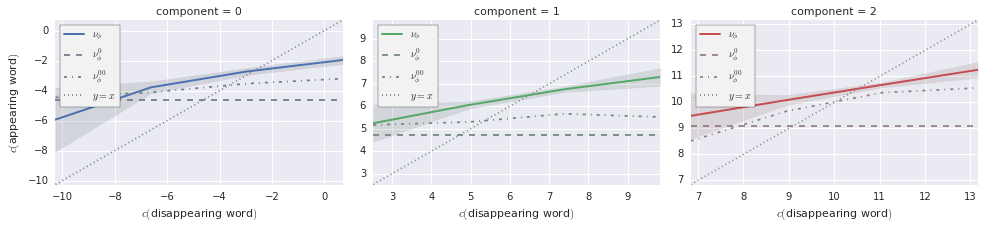

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographic_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 2206 (cluster-unique) substitutions, but the PCA is in fact computed on 971 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.